# Visiopharm data processing

# 1. Import packages and data

pip install opencv-python

In [3]:
import cv2
from matplotlib import image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

# for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Images :

In [5]:
input_images = "./../input_images"

In [6]:
img_A1 = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_images}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_images}/PanCN_AVD_61VQ_0158_D4.jpg')

In [7]:
image_name_A1 = "A1"
image_name_B2 = "B2"
image_name_C3 = "C3"
image_name_D4 = "D4"

Coordinates :

In [10]:
input_coordinates = "./../output_coords"

In [11]:
with open(f"{input_coordinates}/nucleus_coords_A1_wo_background.json", 'r') as file:
    nuclei_coords_A1 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_B2_wo_background.json", 'r') as file:
    nuclei_coords_B2 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_C3_wo_background.json", 'r') as file:
    nuclei_coords_C3 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_D4_wo_background.json", 'r') as file:
    nuclei_coords_D4 = json.load(file)

Output:

In [12]:
output_csv = "./preprocess_visiopharm"

Open file : 

In [13]:
data = pd.read_csv('Results-AllSamples (1).tsv',sep='\t')
data

Study level 1               Name  \
0            Adriana  PanCN_C3_original   
1            Adriana  PanCN_C3_original   
2            Adriana  PanCN_C3_original   
3            Adriana  PanCN_C3_original   
4            Adriana  PanCN_C3_original   
...              ...                ...   
467750       Adriana   PDAC_B2_original   
467751       Adriana   PDAC_B2_original   
467752       Adriana   PDAC_B2_original   
467753       Adriana   PDAC_B2_original   
467754       Adriana   PDAC_B2_original   

                                                Image  \
0       D:\Image_pancreas\tiff\PanCN_C3_original.tiff   
1       D:\Image_pancreas\tiff\PanCN_C3_original.tiff   
2       D:\Image_pancreas\tiff\PanCN_C3_original.tiff   
3       D:\Image_pancreas\tiff\PanCN_C3_original.tiff   
4       D:\Image_pancreas\tiff\PanCN_C3_original.tiff   
...                                               ...   
467750   D:\Image_pancreas\tiff\PDAC_B2_original.tiff   
467751   D:\Image_pancreas\tiff\PDAC_B2_original.tiff   
467752   D:\Image_pancreas\tiff\PDAC_B2_original.tiff   
467753   D:\Image_pancreas\tiff\PDAC_B2_original.tiff   
467754   D:\Image_pancreas\tiff\PDAC_B2_original.tiff   

                                           LayerData  Total Nuclei (#)  \
0       D:\Database\d6\e6211\ses268_57515_Result.mld            148873   
1       D:\Database\d6\e6211\ses268_57515_Result.mld            148873   
2       D:\Database\d6\e6211\ses268_57515_Result.mld            148873   
3       D:\Database\d6\e6211\ses268_57515_Result.mld            148873   
4       D:\Database\d6\e6211\ses268_57515_Result.mld            148873   
...                                              ...               ...   
467750  D:\Database\d6\e6214\ses268_57562_Result.mld             90953   
467751  D:\Database\d6\e6214\ses268_57562_Result.mld             90953   
467752  D:\Database\d6\e6214\ses268_57562_Result.mld             90953   
467753  D:\Database\d6\e6214\ses268_57562_Result.mld             90953   
467754  D:\Database\d6\e6214\ses268_57562_Result.mld             90953   

        Nuclei Area per object  Texture inertia  Max Intensity  \
0                        37.00      4624.952512     104.315163   
1                        52.50      4624.952512     105.821548   
2                        33.50      4624.952512     132.559052   
3                        34.75      4624.952512     114.042694   
4                        50.00      4624.952512     111.790764   
...                        ...              ...            ...   
467750                   28.75     13221.945991     231.892365   
467751                   16.00     13221.945991     229.378082   
467752                   12.00     13221.945991     233.848938   
467753                   23.25     13221.945991     237.114182   
467754                   67.00     13221.945991     245.298767   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
0            70.199417      49.392860   60.350582            0.261332   
1            60.258968      33.355782   41.344807            0.394836   
2           104.915861      64.481720  132.559052            0.075851   
3            65.169379      41.246712   74.150513            0.508010   
4            80.436637      46.212833   59.376213            0.281402   
...                ...            ...         ...                 ...   
467750      220.709386     206.059235  222.745132            0.468253   
467751      220.169842     210.485458  222.745132            0.483503   
467752      229.316310     224.627930  228.608246            0.452015   
467753      222.590399     213.934448  217.349335            0.252839   
467754      226.371344     197.651382  236.230515            0.324043   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
0              8.969983         1097.227225                32.302473   
1              8.944638         1774.762880                75.181738   
2              9.050427       

# Function definition

In [20]:
def preprocess_visiopharm(path_img, path_csv, name, vertex_x, vertex_y):
    img = cv2.imread(path_img)
    visio_csv = pd.read_csv(path_csv, sep='\t')
    visio_csv = visio_csv.drop(columns= ["Study level 1", "Study level 2","Image", "LayerData"])
    visio_df = visio_csv[(visio_csv['Name'] == name)]
    coord = visio_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
    np_coord = coord.to_numpy()
    x,y = zip(*np_coord.tolist())
    x_new = [x * 2 + vertex_x*2 for x in x]
    y_new= [x * -2 + vertex_y*2 for x in y]
    visio_df["new_x"] = x_new
    visio_df["new_y"] = y_new
    
    plt.imshow(img)
    plt.scatter(x_new,y_new, s = 1)
    plt.show()
    
    visio_df.to_csv(f'preprocess_visiopharm/df_{name}.csv')
    
    return(visio_df)

# 2. Split into 4 dataframe

## A1

In [45]:
PDAC_A1_df = data[(data['Name'] == 'PDAC_A1_original')]
PDAC_A1_df

Name  Total Nuclei (#)  Nuclei Area per object  \
308620  PDAC_A1_original             68182                   45.00   
308621  PDAC_A1_original             68182                   34.25   
308622  PDAC_A1_original             68182                   26.00   
308623  PDAC_A1_original             68182                   31.25   
308624  PDAC_A1_original             68182                   29.50   
...                  ...               ...                     ...   
376797  PDAC_A1_original             68182                   25.50   
376798  PDAC_A1_original             68182                   21.00   
376799  PDAC_A1_original             68182                   58.50   
376800  PDAC_A1_original             68182                  124.50   
376801  PDAC_A1_original             68182                   55.75   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
308620     32675.868688     244.985046      234.832569     220.360519   
308621     32675.868688     230.576035      220.815632     199.916138   
308622     32675.868688     229.048431      212.140642     196.789001   
308623     32675.868688     234.865784      219.384485     197.050797   
308624     32675.868688     233.635300      226.444080     216.669022   
...                 ...            ...             ...            ...   
376797     32675.868688     230.582230      224.636758     218.785187   
376798     32675.868688     221.403839      213.196486     206.972717   
376799     32675.868688     228.608246      212.777876     196.782059   
376800     32675.868688     233.197876      219.331567     205.573242   
376801     32675.868688     238.807999      225.569799     209.096054   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
308620  236.876541            0.743286         8.928936         1930.636665   
308621  224.081451            0.470135         8.889363          804.824419   
308622  217.865189            0.449608         9.165490         1156.876046   
308623  220.057480            0.472518         8.967712          951.591943   
308624  229.025635            0.445650         8.968187          880.616548   
...            ...                 ...              ...                 ...   
376797  224.411392            0.333318         9.146814          916.805855   
376798  210.446457            0.448730         9.271387         1127.251185   
376799  205.573242            0.614737         8.302590          566.074187   
376800  219.382385            0.632045         7.690682          385.186085   
376801  227.729568            0.416220         8.351862          408.227567   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  
308620                82.163755          495.621256 -4060.027778  4180.108333  
308621               143.726567          426.448272 -3990.854015  4197.600365  
308622                38.447454          636.734888 -4028.447115  4195.461538  
308623               134.154471          501.947374 -3984.792000  4191.570000  
308624               156.358767          488.170153 -3979.190678  4183.745763  
...                         ...                 ...          ...          ...  
376797                53.308064          611.218312  3793.509804 -4224.431373  
376798                44.599224          621.419539  3781.291667 -4224.529762  
376799                17.496186          218.087350  3971.104701 -4231.767094  
376800                37.402035          141.731061  3986.550201 -4192.934739  
376801                51.776605          238.314915  3989.264574 -4201.341928  

[68182 rows x 15 columns]

In [46]:
coord_A1 = PDAC_A1_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_A1

Center X     Center Y
308620 -4060.027778  4180.108333
308621 -3990.854015  4197.600365
308622 -4028.447115  4195.461538
308623 -3984.792000  4191.570000
308624 -3979.190678  4183.745763
...             ...          ...
376797  3793.509804 -4224.431373
376798  3781.291667 -4224.529762
376799  3971.104701 -4231.767094
376800  3986.550201 -4192.934739
376801  3989.264574 -4201.341928

[68182 rows x 2 columns]

## B2

In [18]:
PDAC_B2_df = data[(data['Name'] == 'PDAC_B2_original')]
PDAC_B2_df = PDAC_B2_df.reset_index(drop=True)
PDAC_B2_df.to_csv(f'{output_csv}/PDAC_B2_df')
PDAC_B2_df

Name  Total Nuclei (#)  Nuclei Area per object  \
0      PDAC_B2_original             90953                   22.50   
1      PDAC_B2_original             90953                   56.25   
2      PDAC_B2_original             90953                   18.50   
3      PDAC_B2_original             90953                   13.25   
4      PDAC_B2_original             90953                   18.50   
...                 ...               ...                     ...   
90948  PDAC_B2_original             90953                   28.75   
90949  PDAC_B2_original             90953                   16.00   
90950  PDAC_B2_original             90953                   12.00   
90951  PDAC_B2_original             90953                   23.25   
90952  PDAC_B2_original             90953                   67.00   

       Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0         13221.945991     148.265762      123.238940      97.844582   
1         13221.945991     229.297897      180.612488     138.413345   
2         13221.945991     219.379120      164.964777      98.549644   
3         13221.945991     209.646164      152.203821     107.101357   
4         13221.945991     246.869537      169.691705      99.229431   
...                ...            ...             ...            ...   
90948     13221.945991     231.892365      220.709386     206.059235   
90949     13221.945991     229.378082      220.169842     210.485458   
90950     13221.945991     233.848938      229.316310     224.627930   
90951     13221.945991     237.114182      222.590399     213.934448   
90952     13221.945991     245.298767      226.371344     197.651382   

            Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0      111.745285        1.554312e-15         2.201911            0.847026   
1      158.885101        1.733108e-01         2.203774            1.682064   
2      117.509422        1.757970e-01         9.646840         1512.508475   
3      145.107941        7.963259e-01        10.012107         5461.165999   
4      134.526611        2.588855e-01         9.693675         1467.966275   
...           ...                 ...              ...                 ...   
90948  222.745132        4.682526e-01         9.493017         2010.231802   
90949  222.745132        4.835029e-01         9.595284         1517.902684   
90950  228.608246        4.520148e-01         2.219367           11.426497   
90951  217.349335        2.528394e-01         2.203606            1.865767   
90952  236.230515        3.240433e-01         8.474137          676.878643   

       Texture Major Direction  Texture Minor Axis     Center X     Center Y  
0                     0.000000            0.847026 -1097.844444  3807.416667  
1                    29.911218            1.390544 -1116.802222  3806.620000  
2                   110.905018         1246.614048  -912.635135  3817.364865  
3                     1.543453         1112.298000  -972.103774  3816.452830  
4                   152.599960         1087.931141  -965.398649  3814.871622  
...                        ...                 ...          ...          ...  
90948               143.182735         1068.935604  -611.900000 -3826.560870  
90949                11.260859          783.992336  -512.250000 -3829.585938  
90950                35.967781            6.261552  -455.843750 -3819.947917  
90951                39.153546            1.394027  -460.446237 -3821.564516  
90952               150.615577          457.540673  -446.585821 -3826.733209  

[90953 rows x 15 columns]

In [19]:
coord_B2 = PDAC_B2_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_B2

Center X     Center Y
0     -1097.844444  3807.416667
1     -1116.802222  3806.620000
2      -912.635135  3817.364865
3      -972.103774  3816.452830
4      -965.398649  3814.871622
...            ...          ...
90948  -611.900000 -3826.560870
90949  -512.250000 -3829.585938
90950  -455.843750 -3819.947917
90951  -460.446237 -3821.564516
90952  -446.585821 -3826.733209

[90953 rows x 2 columns]

## C3

In [20]:
PanCN_C3_df = data[(data['Name'] == 'PanCN_C3_original')]
PanCN_C3_df.to_csv(f'{output_csv}/PanCN_C3_df')
PanCN_C3_df

Name  Total Nuclei (#)  Nuclei Area per object  \
0       PanCN_C3_original            148873                   37.00   
1       PanCN_C3_original            148873                   52.50   
2       PanCN_C3_original            148873                   33.50   
3       PanCN_C3_original            148873                   34.75   
4       PanCN_C3_original            148873                   50.00   
...                   ...               ...                     ...   
148868  PanCN_C3_original            148873                   93.25   
148869  PanCN_C3_original            148873                   35.00   
148870  PanCN_C3_original            148873                   20.75   
148871  PanCN_C3_original            148873                   57.50   
148872  PanCN_C3_original            148873                   45.00   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0           4624.952512     104.315163       70.199417      49.392860   
1           4624.952512     105.821548       60.258968      33.355782   
2           4624.952512     132.559052      104.915861      64.481720   
3           4624.952512     114.042694       65.169379      41.246712   
4           4624.952512     111.790764       80.436637      46.212833   
...                 ...            ...             ...            ...   
148868      4624.952512     221.825943      100.886481      14.501585   
148869      4624.952512     102.750008       72.816012      46.798439   
148870      4624.952512     137.925186       77.397275      17.553673   
148871      4624.952512     138.743561       77.629277      37.889965   
148872      4624.952512     132.879868       63.577353      18.157415   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0        60.350582            0.261332         8.969983         1097.227225   
1        41.344807            0.394836         8.944638         1774.762880   
2       132.559052            0.075851         9.050427          824.995626   
3        74.150513            0.508010         9.324317         1972.432776   
4        59.376213            0.281402         8.800007          700.064283   
...            ...                 ...              ...                 ...   
148868   71.406540            0.337550         8.666995          955.332763   
148869   71.915863            0.309520         9.033160         1285.806050   
148870   26.098423            0.287746        10.253332         2739.464186   
148871   55.493210            0.365759         8.650031          740.457483   
148872   50.513172            0.308935         9.015973         1702.667758   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  
0                     32.302473          810.486585 -2236.405405  3823.064189  
1                     75.181738         1074.023232 -2229.757143  3820.059524  
2                     30.106611          762.419292 -2227.414179  3812.813433  
3                    169.161279          970.418105 -2231.764388  3805.392086  
4                    128.933254          503.064811 -2247.412500  3804.812500  
...                         ...                 ...          ...          ...  
148868                35.558941          632.860462  1979.441689 -2990.466488  
148869               108.178018          887.823955  1970.692857 -2990.914286  
148870               128.876169         1951.195006  1948.888554 -2991.536145  
148871                76.087056          469.628831  1955.141304 -2996.045652  
148872                 4.107907         1176.654821  1963.819444 -2997.388889  

[148873 rows x 15 columns]

In [21]:
coord_C3 = PanCN_C3_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_C3

Center X     Center Y
0      -2236.405405  3823.064189
1      -2229.757143  3820.059524
2      -2227.414179  3812.813433
3      -2231.764388  3805.392086
4      -2247.412500  3804.812500
...             ...          ...
148868  1979.441689 -2990.466488
148869  1970.692857 -2990.914286
148870  1948.888554 -2991.536145
148871  1955.141304 -2996.045652
148872  1963.819444 -2997.388889

[148873 rows x 2 columns]

## D4

In [22]:
PanCN_D4_df = data[(data['Name'] == 'PanCN_D4_original')]
PanCN_D4_df.to_csv(f'{output_csv}/PanCN_D4_df')
PanCN_D4_df

Name  Total Nuclei (#)  Nuclei Area per object  \
148873  PanCN_D4_original            159747                   67.25   
148874  PanCN_D4_original            159747                   15.50   
148875  PanCN_D4_original            159747                   53.50   
148876  PanCN_D4_original            159747                   72.00   
148877  PanCN_D4_original            159747                  108.75   
...                   ...               ...                     ...   
308615  PanCN_D4_original            159747                   10.25   
308616  PanCN_D4_original            159747                   37.25   
308617  PanCN_D4_original            159747                   21.50   
308618  PanCN_D4_original            159747                   29.50   
308619  PanCN_D4_original            159747                   35.50   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
148873     16869.514073     207.866180       76.370522      20.588024   
148874     16869.514073     225.621124      116.456644      40.488068   
148875     16869.514073     214.179367       85.728792      21.559574   
148876     16869.514073     103.540054       44.120308      13.217054   
148877     16869.514073     178.337784      104.297971      36.331284   
...                 ...            ...             ...            ...   
308615     16869.514073     255.000000      250.768384     245.534943   
308616     16869.514073     255.000000      220.611945     170.747116   
308617     16869.514073     255.000000      250.879088     238.466583   
308618     16869.514073     252.843475      247.038973     243.477005   
308619     16869.514073     251.091858      251.074353     250.470444   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
148873   53.203392            0.471223         8.992499         1619.012666   
148874   49.444714            0.531944        10.161641         3495.264459   
148875   65.804230            0.168971         9.133137         1763.510254   
148876   26.305471            0.111171         8.370774         1543.516585   
148877  110.689919            0.489828         8.255667          750.763866   
...            ...                 ...              ...                 ...   
308615  252.331848            0.210006        10.004557         1777.546677   
308616  215.242203            0.355311         8.762010          774.651151   
308617  255.000000            0.563844         9.314054         1362.981952   
308618  247.249603            0.297046         9.052229          791.634016   
308619  251.091858            0.229758         8.777813          556.143754   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  
148873                11.602354          856.096916  -957.519517  3157.102230  
148874               179.671109         1635.978268  -972.733871  3155.427419  
148875                 6.999199         1465.527808  -966.883178  3152.855140  
148876                77.947098         1371.922466  -688.531250  3201.194444  
148877                31.119760          383.018743  -738.820115  3189.266667  
...                         ...                 ...          ...          ...  
308615                15.196295         1404.250815 -1703.213415 -2963.780488  
308616                99.481509          499.408973 -1703.625839 -2971.875839  
308617               170.388016          594.472524 -1542.796512 -2986.232558  
308618               152.355395          556.482570 -1682.915254 -2999.771186  
308619                 4.153898          428.365494 -1420.507042 -2854.623239  

[159747 rows x 15 columns]

In [23]:
coord_D4 = PanCN_D4_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_D4

Center X     Center Y
148873  -957.519517  3157.102230
148874  -972.733871  3155.427419
148875  -966.883178  3152.855140
148876  -688.531250  3201.194444
148877  -738.820115  3189.266667
...             ...          ...
308615 -1703.213415 -2963.780488
308616 -1703.625839 -2971.875839
308617 -1542.796512 -2986.232558
308618 -1682.915254 -2999.771186
308619 -1420.507042 -2854.623239

[159747 rows x 2 columns]

# 3. Align coordinates with images

The ouput of Visiopharm is shifted, inversed and has a factor converison of two.

We need to :
- inverse "y" coordinates : * -1
- reverse conversion factor : *2
- shift coordinates : add vertices coordinates of the images in Visiopharm

## A1.

In [47]:
np_coord_A1 = coord_A1.to_numpy()

In [48]:
x_A1,y_A1 = zip(*np_coord_A1.tolist())

In [49]:
x_A1_new = [x * 2 for x in x_A1]
y_A1_new = [x * -2 for x in y_A1]

In [50]:
x_A1_new = [x + 8522 for x in x_A1_new]
y_A1_new = [x + 8620 for x in y_A1_new]

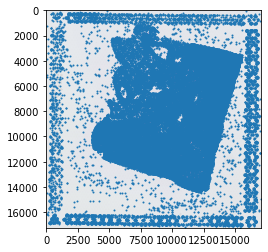

In [51]:
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1)
plt.show()

In [52]:
PDAC_A1_df["new_x"] = x_A1_new
PDAC_A1_df["new_y"] = y_A1_new
PDAC_A1_df

/tmp/ipykernel_645/3779763157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PDAC_A1_df["new_x"] = x_A1_new
/tmp/ipykernel_645/3779763157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PDAC_A1_df["new_y"] = y_A1_new


Name  Total Nuclei (#)  Nuclei Area per object  \
308620  PDAC_A1_original             68182                   45.00   
308621  PDAC_A1_original             68182                   34.25   
308622  PDAC_A1_original             68182                   26.00   
308623  PDAC_A1_original             68182                   31.25   
308624  PDAC_A1_original             68182                   29.50   
...                  ...               ...                     ...   
376797  PDAC_A1_original             68182                   25.50   
376798  PDAC_A1_original             68182                   21.00   
376799  PDAC_A1_original             68182                   58.50   
376800  PDAC_A1_original             68182                  124.50   
376801  PDAC_A1_original             68182                   55.75   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
308620     32675.868688     244.985046      234.832569     220.360519   
308621     32675.868688     230.576035      220.815632     199.916138   
308622     32675.868688     229.048431      212.140642     196.789001   
308623     32675.868688     234.865784      219.384485     197.050797   
308624     32675.868688     233.635300      226.444080     216.669022   
...                 ...            ...             ...            ...   
376797     32675.868688     230.582230      224.636758     218.785187   
376798     32675.868688     221.403839      213.196486     206.972717   
376799     32675.868688     228.608246      212.777876     196.782059   
376800     32675.868688     233.197876      219.331567     205.573242   
376801     32675.868688     238.807999      225.569799     209.096054   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
308620  236.876541            0.743286         8.928936         1930.636665   
308621  224.081451            0.470135         8.889363          804.824419   
308622  217.865189            0.449608         9.165490         1156.876046   
308623  220.057480            0.472518         8.967712          951.591943   
308624  229.025635            0.445650         8.968187          880.616548   
...            ...                 ...              ...                 ...   
376797  224.411392            0.333318         9.146814          916.805855   
376798  210.446457            0.448730         9.271387         1127.251185   
376799  205.573242            0.614737         8.302590          566.074187   
376800  219.382385            0.632045         7.690682          385.186085   
376801  227.729568            0.416220         8.351862          408.227567   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  \
308620                82.163755          495.621256 -4060.027778  4180.108333   
308621               143.726567          426.448272 -3990.854015  4197.600365   
308622                38.447454          636.734888 -4028.447115  4195.461538   
308623               134.154471          501.947374 -3984.792000  4191.570000   
308624               156.358767          488.170153 -3979.190678  4183.745763   
...                         ...                 ...          ...          ...   
376797                53.308064          611.218312  3793.509804 -4224.431373   
376798                44.599224          621.419539  3781.291667 -4224.529762   
376799                17.496186          218.087350  3971.104701 -4231.767094   
376800                37.402035          141.731061  3986.550201 -4192.934739   
376801                51.776605          238.314915  3989.264574 -4201.341928   

               new_x         new_y  
308620    401.944444    259.783333  
308621    540.291971    224.799270  
308622    465.105769    229.076923  
308623    552.416000    236.860000  
308624    563.618644    252.508475  
...              ...           ...  
376797  16109.019608  17068.862745  
376798  16084.583333  17069.059524  
376799  16464.209402  17083.534188  
376800  16

In [68]:
PDAC_A1_df.to_csv(f'{output_csv}/PDAC_A1_df')

## B2.

In [35]:
np_coord_B2 = coord_B2.to_numpy()

In [36]:
x_B2,y_B2 = zip(*np_coord_B2.tolist())

In [37]:
x_B2_new = [x * 2 for x in x_B2]
y_B2_new = [x * -2 for x in y_B2]

In [38]:
x_B2_new = [x + 8454 for x in x_B2_new]
y_B2_new = [x + 8554 for x in y_B2_new]

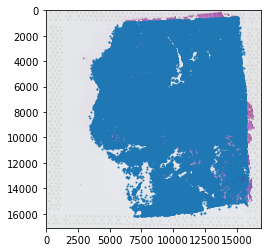

In [39]:
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1)
plt.show()

(7000.0, 8000.0)

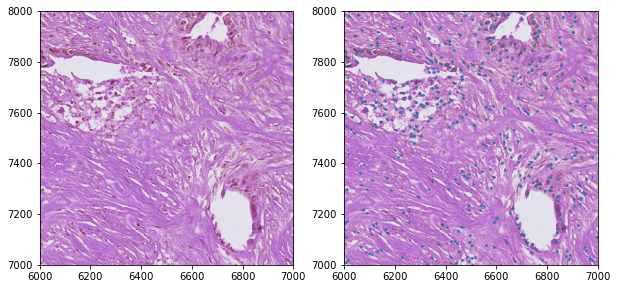

In [28]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_B2)
plt.xlim(6000,7000)
plt.ylim(7000,8000)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_B2)
plt.scatter(x_B2_new_pos,y_B2_new_pos, s = 2)
plt.xlim(6000,7000)
plt.ylim(7000,8000)

In [41]:
PDAC_B2_df["new_x"] = x_B2_new
PDAC_B2_df["new_y"] = y_B2_new
PDAC_B2_df

Name  Total Nuclei (#)  Nuclei Area per object  \
0      PDAC_B2_original             90953                   22.50   
1      PDAC_B2_original             90953                   56.25   
2      PDAC_B2_original             90953                   18.50   
3      PDAC_B2_original             90953                   13.25   
4      PDAC_B2_original             90953                   18.50   
...                 ...               ...                     ...   
90948  PDAC_B2_original             90953                   28.75   
90949  PDAC_B2_original             90953                   16.00   
90950  PDAC_B2_original             90953                   12.00   
90951  PDAC_B2_original             90953                   23.25   
90952  PDAC_B2_original             90953                   67.00   

       Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0         13221.945991     148.265762      123.238940      97.844582   
1         13221.945991     229.297897      180.612488     138.413345   
2         13221.945991     219.379120      164.964777      98.549644   
3         13221.945991     209.646164      152.203821     107.101357   
4         13221.945991     246.869537      169.691705      99.229431   
...                ...            ...             ...            ...   
90948     13221.945991     231.892365      220.709386     206.059235   
90949     13221.945991     229.378082      220.169842     210.485458   
90950     13221.945991     233.848938      229.316310     224.627930   
90951     13221.945991     237.114182      222.590399     213.934448   
90952     13221.945991     245.298767      226.371344     197.651382   

            Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0      111.745285        1.554312e-15         2.201911            0.847026   
1      158.885101        1.733108e-01         2.203774            1.682064   
2      117.509422        1.757970e-01         9.646840         1512.508475   
3      145.107941        7.963259e-01        10.012107         5461.165999   
4      134.526611        2.588855e-01         9.693675         1467.966275   
...           ...                 ...              ...                 ...   
90948  222.745132        4.682526e-01         9.493017         2010.231802   
90949  222.745132        4.835029e-01         9.595284         1517.902684   
90950  228.608246        4.520148e-01         2.219367           11.426497   
90951  217.349335        2.528394e-01         2.203606            1.865767   
90952  236.230515        3.240433e-01         8.474137          676.878643   

       Texture Major Direction  Texture Minor Axis     Center X     Center Y  \
0                     0.000000            0.847026 -1097.844444  3807.416667   
1                    29.911218            1.390544 -1116.802222  3806.620000   
2                   110.905018         1246.614048  -912.635135  3817.364865   
3                     1.543453         1112.298000  -972.103774  3816.452830   
4                   152.599960         1087.931141  -965.398649  3814.871622   
...                        ...                 ...          ...          ...   
90948               143.182735         1068.935604  -611.900000 -3826.560870   
90949                11.260859          783.992336  -512.250000 -3829.585938   
90950                35.967781            6.261552  -455.843750 -3819.947917   
90951                39.153546            1.394027  -460.446237 -3821.564516   
90952               150.615577          457.540673  -446.585821 -3826.733209   

             new_x         new_y  
0      6258.311111    939.166667  
1      6220.395556    940.760000  
2      6628.729730    919.270270  
3      6509.792453    921.094340  
4      6523.202703    924.256757  
...            ...           ...  
90948  7230.200000  16207.121739  
90949  7429.500000  16213.171875  
90950  7542.312500  16193.895833  
90951  7533.107527  16197.129032  
90952  7560.828358  16207.466418  

[90953

In [42]:
PDAC_B2_df.to_csv(f'{output_csv}/PDAC_B2_df')

## C3.

In [54]:
np_coord_C3 = coord_C3.to_numpy()

In [55]:
x_C3,y_C3 = zip(*np_coord_C3.tolist())

In [56]:
x_C3_new = [x * 2 for x in x_C3]
y_C3_new = [x * -2 for x in y_C3]

In [57]:
x_C3_new = [x + 8534 for x in x_C3_new]
y_C3_new = [x + 8608 for x in y_C3_new]

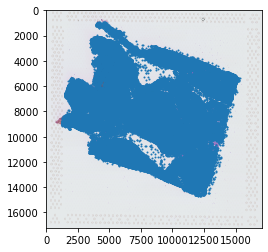

In [58]:
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1)
plt.show()

In [59]:
PanCN_C3_df["new_x"] = x_C3_new
PanCN_C3_df["new_y"] = y_C3_new
PanCN_C3_df

/tmp/ipykernel_645/140312437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PanCN_C3_df["new_x"] = x_C3_new
/tmp/ipykernel_645/140312437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PanCN_C3_df["new_y"] = y_C3_new


Name  Total Nuclei (#)  Nuclei Area per object  \
0       PanCN_C3_original            148873                   37.00   
1       PanCN_C3_original            148873                   52.50   
2       PanCN_C3_original            148873                   33.50   
3       PanCN_C3_original            148873                   34.75   
4       PanCN_C3_original            148873                   50.00   
...                   ...               ...                     ...   
148868  PanCN_C3_original            148873                   93.25   
148869  PanCN_C3_original            148873                   35.00   
148870  PanCN_C3_original            148873                   20.75   
148871  PanCN_C3_original            148873                   57.50   
148872  PanCN_C3_original            148873                   45.00   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0           4624.952512     104.315163       70.199417      49.392860   
1           4624.952512     105.821548       60.258968      33.355782   
2           4624.952512     132.559052      104.915861      64.481720   
3           4624.952512     114.042694       65.169379      41.246712   
4           4624.952512     111.790764       80.436637      46.212833   
...                 ...            ...             ...            ...   
148868      4624.952512     221.825943      100.886481      14.501585   
148869      4624.952512     102.750008       72.816012      46.798439   
148870      4624.952512     137.925186       77.397275      17.553673   
148871      4624.952512     138.743561       77.629277      37.889965   
148872      4624.952512     132.879868       63.577353      18.157415   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0        60.350582            0.261332         8.969983         1097.227225   
1        41.344807            0.394836         8.944638         1774.762880   
2       132.559052            0.075851         9.050427          824.995626   
3        74.150513            0.508010         9.324317         1972.432776   
4        59.376213            0.281402         8.800007          700.064283   
...            ...                 ...              ...                 ...   
148868   71.406540            0.337550         8.666995          955.332763   
148869   71.915863            0.309520         9.033160         1285.806050   
148870   26.098423            0.287746        10.253332         2739.464186   
148871   55.493210            0.365759         8.650031          740.457483   
148872   50.513172            0.308935         9.015973         1702.667758   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  \
0                     32.302473          810.486585 -2236.405405  3823.064189   
1                     75.181738         1074.023232 -2229.757143  3820.059524   
2                     30.106611          762.419292 -2227.414179  3812.813433   
3                    169.161279          970.418105 -2231.764388  3805.392086   
4                    128.933254          503.064811 -2247.412500  3804.812500   
...                         ...                 ...          ...          ...   
148868                35.558941          632.860462  1979.441689 -2990.466488   
148869               108.178018          887.823955  1970.692857 -2990.914286   
148870               128.876169         1951.195006  1948.888554 -2991.536145   
148871                76.087056          469.628831  1955.141304 -2996.045652   
148872                 4.107907         1176.654821  1963.819444 -2997.388889   

               new_x         new_y  
0        4061.189189    961.871622  
1        4074.485714    967.880952  
2        4079.171642    982.373134  
3        4070.471223    997.215827  
4        4039.175000    998.375000  
...              ...           ...  
148868  12492.883378  14588.932976  
148869  12475.385714  14589.828571  
148870  12431.777108  14591.072289  

In [60]:
PanCN_C3_df.to_csv(f'{output_csv}/PanCN_C3_df')

## D4. 

In [61]:
np_coord_D4 = coord_D4.to_numpy()

In [62]:
x_D4,y_D4 = zip(*np_coord_D4.tolist())

In [63]:
x_D4_new = [x * 2 for x in x_D4]
y_D4_new = [x * -2 for x in y_D4]

In [64]:
x_D4_new = [x + 8454 for x in x_D4_new]
y_D4_new = [x + 8554 for x in y_D4_new]

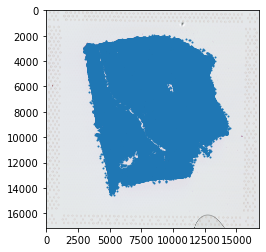

In [65]:
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1)
plt.show()

In [66]:
PanCN_D4_df["new_x"] = x_D4_new
PanCN_D4_df["new_y"] = y_D4_new
PanCN_D4_df

/tmp/ipykernel_645/1034622944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PanCN_D4_df["new_x"] = x_D4_new
/tmp/ipykernel_645/1034622944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PanCN_D4_df["new_y"] = y_D4_new


Name  Total Nuclei (#)  Nuclei Area per object  \
148873  PanCN_D4_original            159747                   67.25   
148874  PanCN_D4_original            159747                   15.50   
148875  PanCN_D4_original            159747                   53.50   
148876  PanCN_D4_original            159747                   72.00   
148877  PanCN_D4_original            159747                  108.75   
...                   ...               ...                     ...   
308615  PanCN_D4_original            159747                   10.25   
308616  PanCN_D4_original            159747                   37.25   
308617  PanCN_D4_original            159747                   21.50   
308618  PanCN_D4_original            159747                   29.50   
308619  PanCN_D4_original            159747                   35.50   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
148873     16869.514073     207.866180       76.370522      20.588024   
148874     16869.514073     225.621124      116.456644      40.488068   
148875     16869.514073     214.179367       85.728792      21.559574   
148876     16869.514073     103.540054       44.120308      13.217054   
148877     16869.514073     178.337784      104.297971      36.331284   
...                 ...            ...             ...            ...   
308615     16869.514073     255.000000      250.768384     245.534943   
308616     16869.514073     255.000000      220.611945     170.747116   
308617     16869.514073     255.000000      250.879088     238.466583   
308618     16869.514073     252.843475      247.038973     243.477005   
308619     16869.514073     251.091858      251.074353     250.470444   

             Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
148873   53.203392            0.471223         8.992499         1619.012666   
148874   49.444714            0.531944        10.161641         3495.264459   
148875   65.804230            0.168971         9.133137         1763.510254   
148876   26.305471            0.111171         8.370774         1543.516585   
148877  110.689919            0.489828         8.255667          750.763866   
...            ...                 ...              ...                 ...   
308615  252.331848            0.210006        10.004557         1777.546677   
308616  215.242203            0.355311         8.762010          774.651151   
308617  255.000000            0.563844         9.314054         1362.981952   
308618  247.249603            0.297046         9.052229          791.634016   
308619  251.091858            0.229758         8.777813          556.143754   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  \
148873                11.602354          856.096916  -957.519517  3157.102230   
148874               179.671109         1635.978268  -972.733871  3155.427419   
148875                 6.999199         1465.527808  -966.883178  3152.855140   
148876                77.947098         1371.922466  -688.531250  3201.194444   
148877                31.119760          383.018743  -738.820115  3189.266667   
...                         ...                 ...          ...          ...   
308615                15.196295         1404.250815 -1703.213415 -2963.780488   
308616                99.481509          499.408973 -1703.625839 -2971.875839   
308617               170.388016          594.472524 -1542.796512 -2986.232558   
308618               152.355395          556.482570 -1682.915254 -2999.771186   
308619                 4.153898          428.365494 -1420.507042 -2854.623239   

              new_x         new_y  
148873  6538.960967   2239.795539  
148874  6508.532258   2243.145161  
148875  6520.233645   2248.289720  
148876  7076.937500   2151.611111  
148877  6976.359770   2175.466667  
...             ...           ...  
308615  5047.573171  14481.560976  
308616  5046.748322  14497.751678  
308617  5368.406977  14526.465116  
308618  5

In [67]:
PanCN_D4_df.to_csv(f'{output_csv}/PanCN_D4_df')

# DLFPC

## 1. Test without function

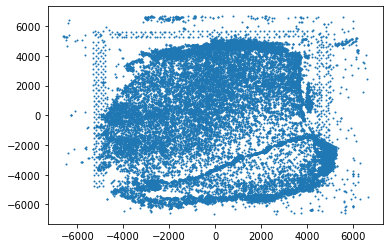

In [17]:
#plt.imshow(img_151507)
plt.scatter(x_151507_new,y_151507_new, s = 1)
plt.show()

### 151676

In [46]:
img_151676 = cv2.imread("visium/151676/spatial/151676.tif")

In [25]:
img_mouse_anterior = cv2.imread("visium/V1_Mouse_Brain_Sagittal_Anterior_image.tif")

In [4]:
DLPFC_mouse = pd.read_csv('morphoplogical_features/DPLFC_brain.tsv',sep='\t')

In [8]:
DLPFC_mouse["Name"].value_counts()

V1_Mouse_Brain_Sagittal_Anterior_image_without_background    39246
DPLFC_151676_without_background                              13404
Name: Name, dtype: int64

In [9]:
test = pd.read_csv('morphoplogical_features/DFPLCwoBG_Results_20230615.tsv',sep='\t')

In [10]:
test["Name"].value_counts()

DPLFC_151509_without_background    51523
DPLFC_151510_without_background    37447
DPLFC_151508_without_background    27789
DPLFC_151507_without_background    25976
DPLFC_151673_without_background    23606
DPLFC_151674_without_background    21345
DPLFC_151671_without_background    18797
DPLFC_151672_without_background    16535
DPLFC_151675_without_background    16276
DPLFC_151669_without_background    13998
DPLFC_151670_without_background    11402
Name: Name, dtype: int64

In [11]:
test = pd.read_csv('morphoplogical_features/Images_without_background_Results_20230612.tsv',sep='\t')

In [12]:
test["Name"].value_counts()

D4_without_background    158683
C3_without_background    148612
B2_without_background     92741
A1_without_background     59108
Name: Name, dtype: int64

In [27]:
DLPFC_mouse = DLPFC_mouse.drop(columns= ["Study level 1", "Study level 2","Image", "LayerData"])
DLPFC_mouse

Name  Total Nuclei (#)  \
0                        DPLFC_151676_without_background             13404   
1                        DPLFC_151676_without_background             13404   
2                        DPLFC_151676_without_background             13404   
3                        DPLFC_151676_without_background             13404   
4                        DPLFC_151676_without_background             13404   
...                                                  ...               ...   
52645  V1_Mouse_Brain_Sagittal_Anterior_image_without...             39246   
52646  V1_Mouse_Brain_Sagittal_Anterior_image_without...             39246   
52647  V1_Mouse_Brain_Sagittal_Anterior_image_without...             39246   
52648  V1_Mouse_Brain_Sagittal_Anterior_image_without...             39246   
52649  V1_Mouse_Brain_Sagittal_Anterior_image_without...             39246   

       Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                      138.50       478.409601       8.463478        8.463478   
1                       15.50     11542.450202     173.391632       58.333363   
2                       10.50     10414.421568     160.725739       63.310608   
3                       13.50     11517.755505     118.512352       56.744924   
4                       21.50      6711.676488     179.714432       84.848861   
...                       ...              ...            ...             ...   
52645                   25.50      8677.509283     224.672150       67.917210   
52646                   15.50     11549.298044     172.800537       74.343711   
52647                   70.75     29179.467477     194.869766       14.255024   
52648                   54.75     27389.302698     219.288162       13.089041   
52649                   59.50     16128.193513     163.003494        9.112806   

       Min Intensity      Modus  Texture Anisotropy  Texture Entropy  \
0           8.463478   8.463478            0.724220         7.593703   
1           5.287324  72.266385            0.523617        10.878269   
2          21.240181  21.240181            0.625472        10.880103   
3          21.115068  21.115068            0.057540        10.699031   
4          33.623196  69.147334            0.357949        10.231761   
...              ...        ...                 ...              ...   
52645      23.015484  68.309462            0.509062        10.269088   
52646      21.332787  21.332787            0.100772        10.798928   
52647       8.463478   8.463478            0.568566        11.263848   
52648       8.463478   8.463478            0.559753        11.669589   
52649       8.463478   8.463478            0.031998        10.367463   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0              374.993693                49.795365          103.415908   
1             7818.062025               173.425880         3724.388177   
2             7576.726581                45.226170         2837.694987   
3             5929.467531               104.818782         5588.287974   
4             4087.373649                70.537003         2624.302839   
...                   ...                      ...                 ...   
52645         5820.168758                51.013643         2857.340525   
52646         6081.047830               141.422307         5468.250214   
52647        20384.776057               177.401780         8794.691421   
52648        19017.088735               179.568128         8372.213962   
52649         8195.210497               175.881433         7932.983016   

          Center X     Center Y  
0       903.493682  3088.103791  
1       945.750000  3085.306452  
2       973.214286  3073.714286  
3       993.101852  3066.851852  
4       986.709302  3060.639535  
...            ...          ...  
52645  1638.558824 -2324.210784  
52646  1655.233871 -2327.354839  
52647  1647.181095 -2332.305654  
52648  1668.421233 -2335.148402  
52649  1707.92

In [37]:
df_151676 = DLPFC_mouse[(DLPFC_mouse['Name'] == "DPLFC_151676_without_background")]
df_151676

Name  Total Nuclei (#)  \
0      DPLFC_151676_without_background             13404   
1      DPLFC_151676_without_background             13404   
2      DPLFC_151676_without_background             13404   
3      DPLFC_151676_without_background             13404   
4      DPLFC_151676_without_background             13404   
...                                ...               ...   
13399  DPLFC_151676_without_background             13404   
13400  DPLFC_151676_without_background             13404   
13401  DPLFC_151676_without_background             13404   
13402  DPLFC_151676_without_background             13404   
13403  DPLFC_151676_without_background             13404   

       Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                      138.50       478.409601       8.463478        8.463478   
1                       15.50     11542.450202     173.391632       58.333363   
2                       10.50     10414.421568     160.725739       63.310608   
3                       13.50     11517.755505     118.512352       56.744924   
4                       21.50      6711.676488     179.714432       84.848861   
...                       ...              ...            ...             ...   
13399                   10.00      8015.631092     227.865799      111.091171   
13400                   34.50      1517.561706       8.463478        8.463478   
13401                   26.25      1668.667793       8.463478        8.463478   
13402                   37.50      1203.934522       8.463478        8.463478   
13403                   95.00       543.526020       8.463478        8.463478   

       Min Intensity      Modus  Texture Anisotropy  Texture Entropy  \
0           8.463478   8.463478            0.724220         7.593703   
1           5.287324  72.266385            0.523617        10.878269   
2          21.240181  21.240181            0.625472        10.880103   
3          21.115068  21.115068            0.057540        10.699031   
4          33.623196  69.147334            0.357949        10.231761   
...              ...        ...                 ...              ...   
13399      23.015484  23.015484            0.288947        10.999022   
13400       8.463478   8.463478            0.374434         9.057957   
13401       8.463478   8.463478            0.537309         9.102404   
13402       8.463478   8.463478            0.321955         8.836340   
13403       8.463478   8.463478            0.618838         7.930135   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0              374.993693                49.795365          103.415908   
1             7818.062025               173.425880         3724.388177   
2             7576.726581                45.226170         2837.694987   
3             5929.467531               104.818782         5588.287974   
4             4087.373649                70.537003         2624.302839   
...                   ...                      ...                 ...   
13399         4684.618791               136.007348         3331.012301   
13400          933.558958               175.374348          584.002748   
13401         1140.820216               174.063268          527.847576   
13402          717.462388                64.304652          486.472135   
13403          393.528044                 5.656046          149.997977   

          Center X     Center Y  
0       903.493682  3088.103791  
1       945.750000  3085.306452  
2       973.214286  3073.714286  
3       993.101852  3066.851852  
4       986.709302  3060.639535  
...            ...          ...  
13399  -427.325000 -2284.062500  
13400  -420.858696 -2288.594203  
13401  -443.769048 -2293.721429  
13402  2182.433333 -2265.746667  
13403  2172.205263 -2271.619737  

[13404 rows x 15 columns]

In [38]:
coord_151676 = df_151676.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_151676

Center X     Center Y
0       903.493682  3088.103791
1       945.750000  3085.306452
2       973.214286  3073.714286
3       993.101852  3066.851852
4       986.709302  3060.639535
...            ...          ...
13399  -427.325000 -2284.062500
13400  -420.858696 -2288.594203
13401  -443.769048 -2293.721429
13402  2182.433333 -2265.746667
13403  2172.205263 -2271.619737

[13404 rows x 2 columns]

In [39]:
np_coord_151676 = coord_151676.to_numpy()

In [40]:
x_151676,y_151676 = zip(*np_coord_151676.tolist())

In [54]:
x_151676_new = [x * 2 for x in x_151676]
y_151676_new = [x * -2 for x in y_151676]

In [56]:
x_151676_new = [x + 6666 for x in x_151676_new]
y_151676_new = [x + 6666 for x in y_151676_new]

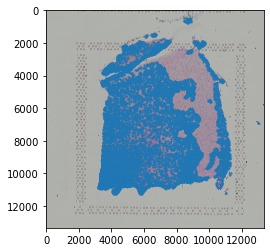

In [57]:
plt.imshow(img_151676)
plt.scatter(x_151676_new,y_151676_new, s = 1)
plt.show()

In [ ]:
df_151676["new_x"] = x_151676_new
df_151676["new_y"] = y_151676_new
df_151676

In [60]:
PanCN_D4_df.to_csv('preprocess_visiopharm/df_151676.csv')

NameError: name 'PanCN_D4_df' is not defined

# Using function

## 151676

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


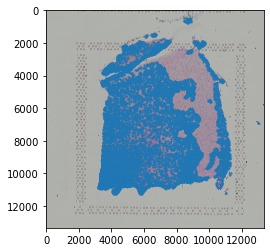

In [12]:
df_151676 = preprocess_visiopharm("visium/151676/spatial/151676.tif", "morphoplogical_features/DPLFC_brain.tsv", "DPLFC_151676_without_background", 3333, 3333)

In [5]:
df_151676

Name  Total Nuclei (#)  \
0      DPLFC_151676_without_background             13404   
1      DPLFC_151676_without_background             13404   
2      DPLFC_151676_without_background             13404   
3      DPLFC_151676_without_background             13404   
4      DPLFC_151676_without_background             13404   
...                                ...               ...   
13399  DPLFC_151676_without_background             13404   
13400  DPLFC_151676_without_background             13404   
13401  DPLFC_151676_without_background             13404   
13402  DPLFC_151676_without_background             13404   
13403  DPLFC_151676_without_background             13404   

       Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                      138.50       478.409601       8.463478        8.463478   
1                       15.50     11542.450202     173.391632       58.333363   
2                       10.50     10414.421568     160.725739       63.310608   
3                       13.50     11517.755505     118.512352       56.744924   
4                       21.50      6711.676488     179.714432       84.848861   
...                       ...              ...            ...             ...   
13399                   10.00      8015.631092     227.865799      111.091171   
13400                   34.50      1517.561706       8.463478        8.463478   
13401                   26.25      1668.667793       8.463478        8.463478   
13402                   37.50      1203.934522       8.463478        8.463478   
13403                   95.00       543.526020       8.463478        8.463478   

       Min Intensity      Modus  Texture Anisotropy  Texture Entropy  \
0           8.463478   8.463478            0.724220         7.593703   
1           5.287324  72.266385            0.523617        10.878269   
2          21.240181  21.240181            0.625472        10.880103   
3          21.115068  21.115068            0.057540        10.699031   
4          33.623196  69.147334            0.357949        10.231761   
...              ...        ...                 ...              ...   
13399      23.015484  23.015484            0.288947        10.999022   
13400       8.463478   8.463478            0.374434         9.057957   
13401       8.463478   8.463478            0.537309         9.102404   
13402       8.463478   8.463478            0.321955         8.836340   
13403       8.463478   8.463478            0.618838         7.930135   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0              374.993693                49.795365          103.415908   
1             7818.062025               173.425880         3724.388177   
2             7576.726581                45.226170         2837.694987   
3             5929.467531               104.818782         5588.287974   
4             4087.373649                70.537003         2624.302839   
...                   ...                      ...                 ...   
13399         4684.618791               136.007348         3331.012301   
13400          933.558958               175.374348          584.002748   
13401         1140.820216               174.063268          527.847576   
13402          717.462388                64.304652          486.472135   
13403          393.528044                 5.656046          149.997977   

          Center X     Center Y         new_x         new_y  
0       903.493682  3088.103791   8472.987365    489.792419  
1       945.750000  3085.306452   8557.500000    495.387097  
2       973.214286  3073.714286   8612.428571    518.571429  
3       993.101852  3066.851852   8652.203704    532.296296  
4       986.709302  3060.639535   8639.418605    544.720930  
...            ...          ...           ...           ...  
13399  -427.325000 -2284.062500   5811.350000  11234.125000  
13400  -420.858696 -2288.594203   5824.282609  11243.188406  
13401  -443.769048 -2293.721

## 151673

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


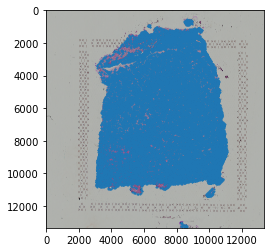

In [13]:
df_151673 = preprocess_visiopharm("visium/151673/spatial/151673.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151673_without_background", 3333, 3333)

In [7]:
df_151673

Name  Total Nuclei (#)  \
203467  DPLFC_151673_without_background             23606   
203468  DPLFC_151673_without_background             23606   
203469  DPLFC_151673_without_background             23606   
203470  DPLFC_151673_without_background             23606   
203471  DPLFC_151673_without_background             23606   
...                                 ...               ...   
227068  DPLFC_151673_without_background             23606   
227069  DPLFC_151673_without_background             23606   
227070  DPLFC_151673_without_background             23606   
227071  DPLFC_151673_without_background             23606   
227072  DPLFC_151673_without_background             23606   

        Nuclei Area per object  Texture inertia  Max Intensity  \
203467                   95.00     24655.804335     185.546249   
203468                   21.50      1618.433606       8.463478   
203469                   10.00     35126.131286     157.659729   
203470                  155.50       718.754990       8.463478   
203471                   12.75      4840.751040     244.590134   
...                        ...              ...            ...   
227068                   29.25      3549.518523     239.434570   
227069                   29.50      2133.731903     255.000000   
227070                   17.75     12350.204475     212.974213   
227071                  112.25       383.281481       8.463478   
227072                   10.25      7853.701049     255.000000   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
203467       12.264198       8.463478    8.463478            0.391970   
203468        8.463478       8.463478    8.463478            0.309978   
203469       19.153144       8.463478    8.463478            0.417149   
203470        8.463478       8.463478    8.463478            0.701569   
203471      143.749484      76.612083   76.612083            0.255347   
...                ...            ...         ...                 ...   
227068      124.279651      30.892626  144.837175            0.192341   
227069      162.844218      97.750954  149.732206            0.497938   
227070       68.513395      17.792803   44.477761            0.251408   
227071        8.463478       8.463478    8.463478            0.126344   
227072      180.962031     109.016418  254.964359            0.450485   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
203467        10.790670        15332.926348                 7.818946   
203468         9.258061          957.640507               170.366037   
203469        12.145731        22191.683061                12.652386   
203470         7.691404          553.556567                69.644816   
203471        10.316672         2774.620980               155.915538   
...                 ...                 ...                      ...   
227068         9.652803         1963.599944                95.399772   
227069         9.225910         1420.534953               130.166834   
227070        10.897518         7062.943308                92.536653   
227071         7.835321          204.563385                85.699194   
227072        10.533719         5068.490823                78.165473   

        Texture Minor Axis    Center X     Center Y        new_x         new_y  
203467         9322.877987  985.302632  3055.556579  8636.605263    554.886842  
203468          660.793099  954.209302  3051.360465  8574.418605    563.279070  
203469        12934.448225  947.150000  3047.075000  8560.300000    571.850000  
203470          165.198424  909.763666  3018.275723  8485.527331    629.448553  
203471         2066.130059  981.083333  3020.612745  8628.166667    624.774510  
...                    ...         ...          ...          ...           ...  
227068         1585.918578  824.279915 -3293.322650  8314.559829  13252.645299  
227069          713.196950  936.449153 -3296.610169  8538.898305  13259.220339  
227070         5287.261166  953.404930

## 151607

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


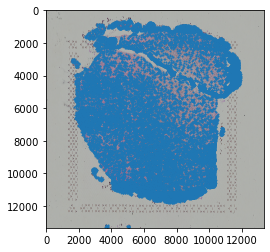

In [16]:
df_151507 = preprocess_visiopharm("visium/151507/spatial/151507.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151507_without_background", 3333, 3333)

## 151508

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


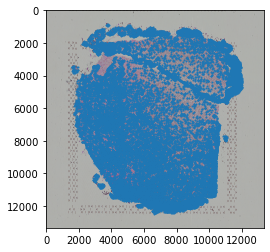

In [17]:
df_151508 = preprocess_visiopharm("visium/151508/spatial/151508.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151508_without_background", 3333, 3333)

## 151509

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


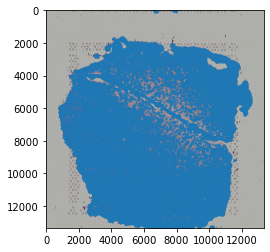

In [18]:
df_151509 = preprocess_visiopharm("visium/151509/spatial/151509.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151509_without_background", 3333, 3333)

## 151510

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


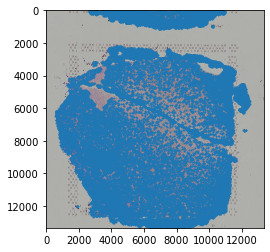

In [ ]:
df_151510 = preprocess_visiopharm("visium/151510/spatial/151510.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151510_without_background", 3333, 3333)

## 151669

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


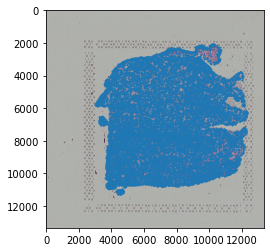

In [20]:
df_151669 = preprocess_visiopharm("visium/151669/spatial/151669.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151669_without_background", 3333, 3333)

## 151670

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


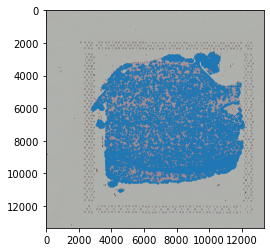

In [21]:
df_151670 = preprocess_visiopharm("visium/151670/spatial/151670.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151670_without_background", 3333, 3333)

## 151671

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


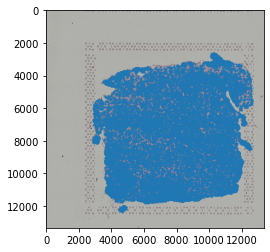

In [29]:
df_151671 = preprocess_visiopharm("visium/151671/spatial/151671.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151671_without_background", 3333, 3333)

## 151672

/tmp/ipykernel_633/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_633/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


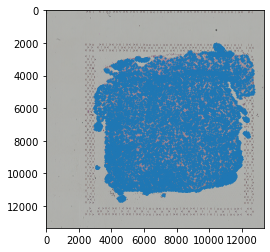

In [4]:
df_151672 = preprocess_visiopharm("visium/151672/spatial/151672.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151672_without_background", 3333, 3333)

## 151674

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


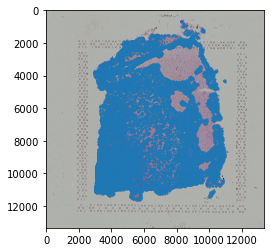

In [23]:
df_151674 = preprocess_visiopharm("visium/151674/spatial/151674.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151674_without_background", 3333, 3333)

## 151675

/tmp/ipykernel_633/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_633/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


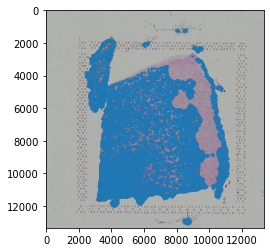

In [7]:
df_151675 = preprocess_visiopharm("visium/151675/spatial/151675.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151675_without_background", 3333, 3333)

# PDAC

## A1

[[ -622.51602564  3768.78846154]
 [ -575.45263158  3769.29736842]
 [ -584.68796992  3767.90037594]
 ...
 [ 2128.29411765 -2742.57352941]
 [ 1765.13157895 -2902.43947368]
 [ 1849.62652439 -2907.51067073]]


/tmp/ipykernel_94/1375609895.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/1375609895.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


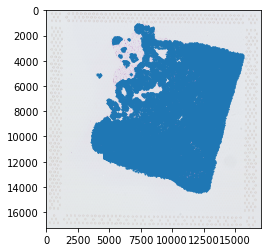

In [19]:
df_151675 = preprocess_visiopharm("./../input_images/PDAC_12747476B_A1.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "A1_without_background", 4261, 4310)

## B2

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


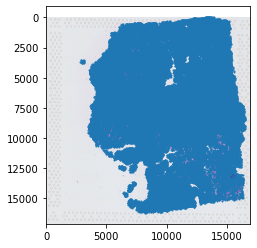

In [21]:
df_151675 = preprocess_visiopharm("./../input_images/PDAC_ILS50185PT2_B2.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "B2_without_background", 4227, 4227)

## C3

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


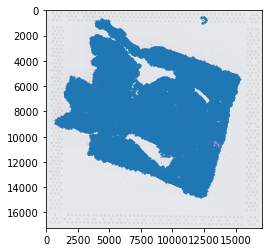

In [23]:
df_151675 = preprocess_visiopharm("./../input_images/PanCN_AVD_79MZ_0594_C3.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "C3_without_background", 4267, 4304)

## D4

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


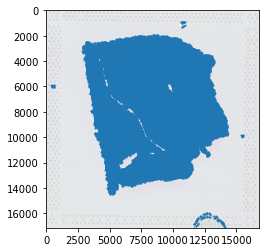

In [24]:
df_151675 = preprocess_visiopharm("./../input_images/PanCN_AVD_61VQ_0158_D4.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "D4_without_background", 4192, 4284)

# Mouse brain

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


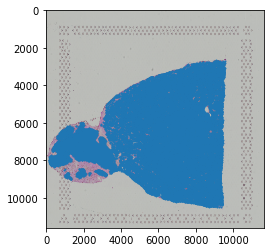

In [27]:
df_151675 = preprocess_visiopharm("./../input_images/mouse_brain/V1_Mouse_Brain_Sagittal_Anterior_image.tif", "morphoplogical_features/DPLFC_brain.tsv", "V1_Mouse_Brain_Sagittal_Anterior_image_without_background", 2905, 2902)

# Preprocessed data wo background

In [5]:
img_A1 = cv2.imread('./../input_images/PDAC_12747476B_A1.jpg')

In [8]:
df_wo_background = pd.read_csv('morphoplogical_features/Images_without_background_Results_20230612.tsv',sep='\t')

In [9]:
df_wo_background = df_wo_background.drop(columns= ["Study level 1", "Study level 2","Image", "LayerData"])
df_wo_background

Name  Total Nuclei (#)  Nuclei Area per object  \
0       A1_without_background             59108                   39.00   
1       A1_without_background             59108                   23.75   
2       A1_without_background             59108                   33.25   
3       A1_without_background             59108                  121.25   
4       A1_without_background             59108                   31.25   
...                       ...               ...                     ...   
459139  D4_without_background            158683                  310.00   
459140  D4_without_background            158683                  178.50   
459141  D4_without_background            158683                   42.75   
459142  D4_without_background            158683                   27.25   
459143  D4_without_background            158683                   82.25   

        Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0           1033.801597       8.463478        8.329601       1.501885   
1           1570.536975       8.463478        8.463478       8.463478   
2           4928.409008      22.767019        8.212570       1.501885   
3          10531.297830     161.933609       10.276105       8.463478   
4           1098.962683       8.463478        8.463478       8.463478   
...                 ...            ...             ...            ...   
459139      2559.689171      25.467731        8.738928       1.501885   
459140     16968.561326     255.000000        9.719622       1.501885   
459141     27409.295053     250.658783      115.760340       1.501885   
459142     25946.692904     249.061462      108.650900       8.463478   
459143     25433.257973     249.685165      109.207827       8.463478   

            Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0        8.461778            0.248777         8.730647          590.331150   
1        8.463478            0.518083         9.147576         1059.800962   
2        8.458740            0.562448         9.523190         3428.334408   
3        8.463478            0.667709        10.258084         7904.653994   
4        8.463478            0.199575         8.875227          610.390810   
...           ...                 ...              ...                 ...   
459139   8.458768            0.256770         7.691690         1468.360095   
459140   8.433474            0.380177        10.168863        10475.562317   
459141  31.551569            0.441559        10.881360        17587.633816   
459142   8.463478            0.708611        10.542663        20092.083012   
459143   8.463478            0.735833         9.846203        20118.588201   

        Texture Major Direction  Texture Minor Axis     Center X     Center Y  
0                    166.857141          443.470447  -622.516026  3768.788462  
1                    161.842605          510.736013  -575.452632  3769.297368  
2                     11.852310         1500.074601  -584.687970  3767.900376  
3                      2.087258         2626.643836  -637.186598  3766.634536  
4                     27.352479          488.571874  -662.452000  3762.922000  
...                         ...                 ...          ...          ...  
459139                58.291445         1091.329076  1746.537500 -4191.454032  
459140                46.404852         6492.999009  1732.443277 -4228.730392  
459141               133.498265         9821.661237  2826.960526 -4191.359649  
459142               128.843799         5854.609892  2838.483945 -4207.844037  
459143               128.964724         5314.669772  2857.450608 -4234.668693  

[459144 rows x 15 columns]

In [12]:
df_A1_wobk= df_wo_background[(df_wo_background['Name'] == "A1_without_background")]
df_A1_wobk

Name  Total Nuclei (#)  Nuclei Area per object  \
0      A1_without_background             59108                   39.00   
1      A1_without_background             59108                   23.75   
2      A1_without_background             59108                   33.25   
3      A1_without_background             59108                  121.25   
4      A1_without_background             59108                   31.25   
...                      ...               ...                     ...   
59103  A1_without_background             59108                   84.75   
59104  A1_without_background             59108                  312.50   
59105  A1_without_background             59108                   17.00   
59106  A1_without_background             59108                   71.25   
59107  A1_without_background             59108                   82.00   

       Texture inertia  Max Intensity  Mean Intensity  Min Intensity  \
0          1033.801597       8.463478        8.329601       1.501885   
1          1570.536975       8.463478        8.463478       8.463478   
2          4928.409008      22.767019        8.212570       1.501885   
3         10531.297830     161.933609       10.276105       8.463478   
4          1098.962683       8.463478        8.463478       8.463478   
...                ...            ...             ...            ...   
59103     26998.609053     254.691299       18.342098       1.501885   
59104      1795.161441      90.308792        8.906937       8.463478   
59105      4839.535404     139.622604       90.546526      45.224926   
59106      9240.145522      31.610882       12.240870       8.463478   
59107     11727.087797     161.933609       13.540160       3.899318   

           Modus  Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0       8.461778            0.248777         8.730647          590.331150   
1       8.463478            0.518083         9.147576         1059.800962   
2       8.458740            0.562448         9.523190         3428.334408   
3       8.463478            0.667709        10.258084         7904.653994   
4       8.463478            0.199575         8.875227          610.390810   
...          ...                 ...              ...                 ...   
59103   8.425033            0.409431        11.280317        16974.186744   
59104   8.463478            0.321277         7.240777         1069.361627   
59105  76.452674            0.583069        10.128495         3415.505490   
59106   8.463478            0.554846        10.311807         6393.883519   
59107   8.452064            0.405538        10.090406         7354.887398   

       Texture Major Direction  Texture Minor Axis     Center X     Center Y  
0                   166.857141          443.470447  -622.516026  3768.788462  
1                   161.842605          510.736013  -575.452632  3769.297368  
2                    11.852310         1500.074601  -584.687970  3767.900376  
3                     2.087258         2626.643836  -637.186598  3766.634536  
4                    27.352479          488.571874  -662.452000  3762.922000  
...                        ...                 ...          ...          ...  
59103                88.562628        10024.422309  2185.452802 -2730.865044  
59104                63.361041          725.799815  2177.476800 -2757.356800  
59105                10.940613         1424.029914  2128.294118 -2742.573529  
59106                 0.277748         2846.262003  1765.131579 -2902.439474  
59107                22.175790         4372.200399  1849.626524 -2907.510671  

[59108 rows x 15 columns]

In [13]:
coord_A1_wobk = df_A1_wobk.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
coord_A1_wobk

Center X     Center Y
0      -622.516026  3768.788462
1      -575.452632  3769.297368
2      -584.687970  3767.900376
3      -637.186598  3766.634536
4      -662.452000  3762.922000
...            ...          ...
59103  2185.452802 -2730.865044
59104  2177.476800 -2757.356800
59105  2128.294118 -2742.573529
59106  1765.131579 -2902.439474
59107  1849.626524 -2907.510671

[59108 rows x 2 columns]

In [14]:
np_coord_A1_wobk = coord_A1_wobk.to_numpy()

In [15]:
x_A1_wobk,y_A1_wobk = zip(*np_coord_A1_wobk.tolist())

In [16]:
x_A1_wobk_new = [x * 2 for x in x_A1_wobk]
y_A1_wobk_new = [x * -2 for x in y_A1_wobk]

In [17]:
x_A1_wobk_new = [x + 8522 for x in x_A1_wobk_new]
y_A1_wobk_new = [x + 8620 for x in y_A1_wobk_new]

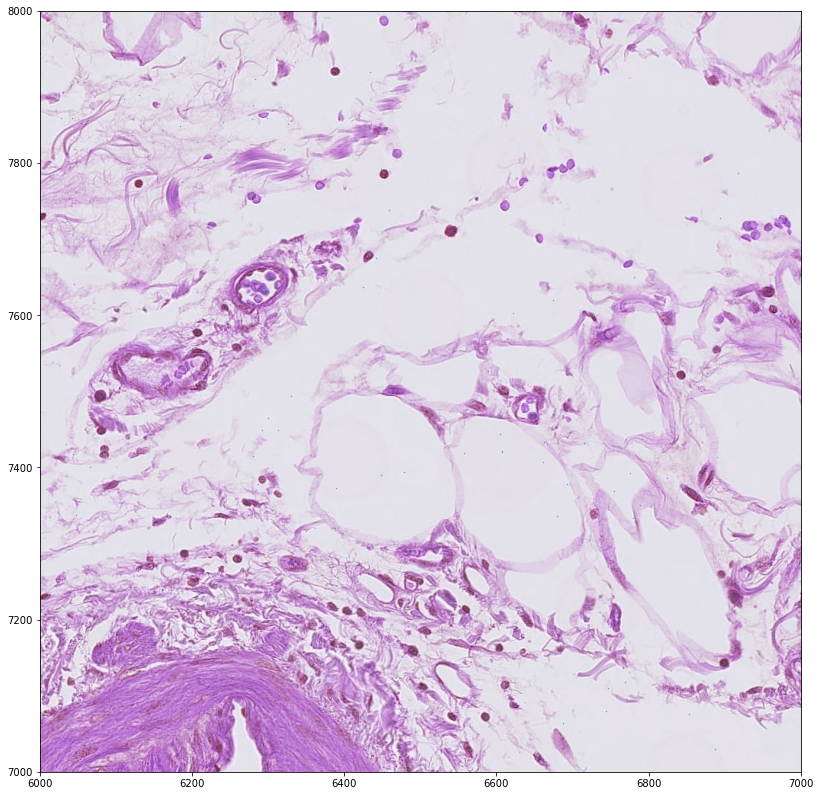

In [22]:
fig = plt.figure(figsize=(20, 14))
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.imshow(img_A1)
plt.scatter(x_A1_wobk_new,y_A1_wobk_new, s = 0.07)
plt.show()

# Figure for report

Text(0.5, 1.0, 'PDAC B2')

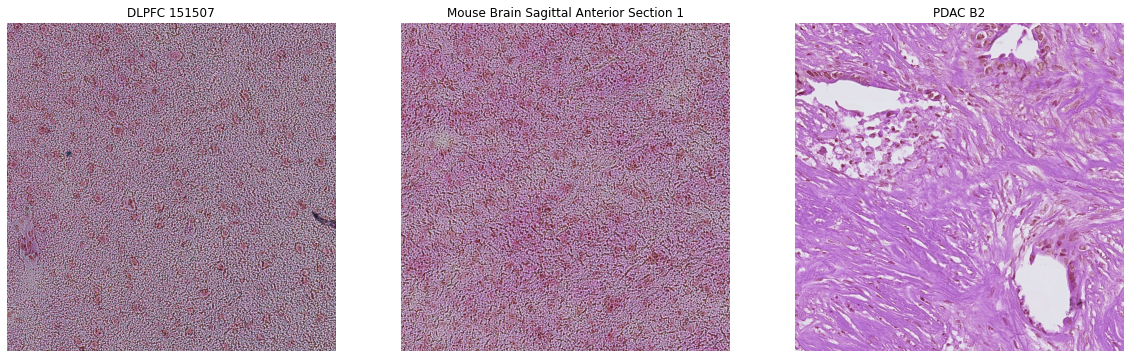

In [44]:
# create figure
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 3
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_151507)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('DLPFC 151507')

fig.add_subplot(rows, columns, 2)
plt.imshow(mouse_anterior)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('Mouse Brain Sagittal Anterior Section 1')

fig.add_subplot(rows, columns, 3)
plt.imshow(img_B2)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('PDAC B2')

# 4. Kmeans Clustering

## A1

### Without coordinates

Begin with df without the x and y coordinates :

In [141]:
A1_df_wo_coords = PDAC_A1_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y"])
A1_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  \
308620                   45.00     32675.868688     244.985046   
308621                   34.25     32675.868688     230.576035   
308622                   26.00     32675.868688     229.048431   
308623                   31.25     32675.868688     234.865784   
308624                   29.50     32675.868688     233.635300   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
308620      234.832569     220.360519  236.876541            0.743286   
308621      220.815632     199.916138  224.081451            0.470135   
308622      212.140642     196.789001  217.865189            0.449608   
308623      219.384485     197.050797  220.057480            0.472518   
308624      226.444080     216.669022  229.025635            0.445650   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
308620         8.928936         1930.636665                82.163755   
308621         8.889363          804.824419               143.726567   
308622         9.165490         1156.876046                38.447454   
308623         8.967712          951.591943               134.154471   
308624         8.968187          880.616548               156.358767   

        Texture Minor Axis  
308620          495.621256  
308621          426.448272  
308622          636.734888  
308623          501.947374  
308624          488.170153

In [142]:
A1_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            68182.000000     6.818200e+04   68182.000000    68182.000000   
mean                27.431723     3.267587e+04     212.066145      151.974144   
std                 15.035154     9.156860e-09      29.637680       42.915659   
min                 10.000000     3.267587e+04      91.276756       33.192097   
25%                 17.250000     3.267587e+04     191.669586      118.757015   
50%                 23.250000     3.267587e+04     215.546661      146.378921   
75%                 33.250000     3.267587e+04     234.646252      180.235472   
max                227.250000     3.267587e+04     255.000000      254.691299   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   68182.000000  68182.000000        68182.000000     68182.000000   
mean       97.481690    127.527932            0.342633         9.234402   
std        55.911788     63.046698            0.166032         1.480488   
min         0.013496      0.250160            0.000000         2.201910   
25%        55.993351     76.783691            0.219707         9.094605   
50%        83.338570    117.896809            0.338702         9.534198   
75%       125.606115    171.761044            0.462058         9.894587   
max       254.691299    255.000000            0.876285        11.468803   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count        68182.000000             68182.000000        68182.000000  
mean          2093.294367                85.581673         1329.504993  
std           1343.631490                58.769841          857.386913  
min              0.847026                 0.000000            0.847026  
25%           1191.395463                30.530560          722.520636  
50%           1839.712333                82.905361         1157.502885  
75%           2695.297950               141.531195         1757.728998  
max          17674.775230               179.998961         9136.641144

To give equal importance to all features, scale the features :

In [143]:
mms = StandardScaler()
mms.fit(A1_df_wo_coords)
A1_df_wo_coords_transformed = mms.transform(A1_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [144]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(A1_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

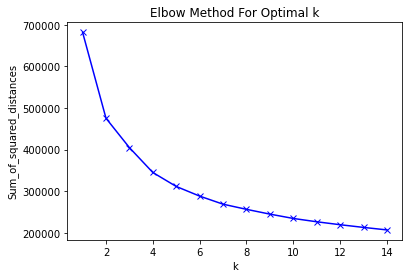

In [145]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [169]:
kmeans_A1_wo_coords = KMeans(n_clusters=4).fit(A1_df_wo_coords_transformed)
centroids = kmeans_A1_wo_coords.cluster_centers_
print(centroids)

[[ 3.71292000e-01  1.00000000e+00  1.37210099e-01 -5.83873950e-02
  -1.98820057e-01 -6.92590000e-02  4.08511410e-02  3.12038423e-02
  -3.22818629e-01 -5.31560547e-03 -3.40317255e-01]
 [ 5.87253377e-02  1.00000000e+00  9.56651439e-01  1.43285822e+00
   1.46584635e+00  1.38141014e+00  4.04605901e-01 -1.53182670e-03
  -5.41983789e-01  5.77545267e-02 -6.47321834e-01]
 [-5.31983133e-01  1.00000000e+00 -8.66975548e-01 -9.57394605e-01
  -7.99018014e-01 -9.06191945e-01 -1.87711691e-01  5.15631575e-01
   9.91617941e-01  6.59600491e-02  1.08915547e+00]
 [ 6.43345910e-02  1.00000000e+00 -1.55097286e-02 -1.28981799e-02
  -1.28054533e-02 -1.24401324e-02 -1.29419177e+00 -4.56135406e+00
  -1.49064569e+00 -8.28174644e-01 -1.48049324e+00]]


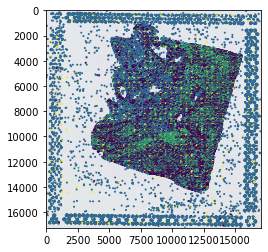

In [170]:
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [148]:
A1_df_with_coords = PDAC_A1_df.drop(columns = ["Name", "Total Nuclei (#)"])

In [151]:
A1_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            68182.000000     6.818200e+04   68182.000000    68182.000000   
mean                27.431723     3.267587e+04     212.066145      151.974144   
std                 15.035154     9.156860e-09      29.637680       42.915659   
min                 10.000000     3.267587e+04      91.276756       33.192097   
25%                 17.250000     3.267587e+04     191.669586      118.757015   
50%                 23.250000     3.267587e+04     215.546661      146.378921   
75%                 33.250000     3.267587e+04     234.646252      180.235472   
max                227.250000     3.267587e+04     255.000000      254.691299   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   68182.000000  68182.000000        68182.000000     68182.000000   
mean       97.481690    127.527932            0.342633         9.234402   
std        55.911788     63.046698            0.166032         1.480488   
min         0.013496      0.250160            0.000000         2.201910   
25%        55.993351     76.783691            0.219707         9.094605   
50%        83.338570    117.896809            0.338702         9.534198   
75%       125.606115    171.761044            0.462058         9.894587   
max       254.691299    255.000000            0.876285        11.468803   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count        68182.000000             68182.000000        68182.000000   
mean          2093.294367                85.581673         1329.504993   
std           1343.631490                58.769841          857.386913   
min              0.847026                 0.000000            0.847026   
25%           1191.395463                30.530560          722.520636   
50%           1839.712333                82.905361         1157.502885   
75%           2695.297950               141.531195         1757.728998   
max          17674.775230               179.998961         9136.641144   

           Center X      Center Y  
count  68182.000000  68182.000000  
mean     778.123637      5.081502  
std     1657.038284   1766.219321  
min    -4244.929752  -4302.895833  
25%     -423.401122  -1161.723059  
50%      866.600891   -315.317389  
75%     2113.970937   1387.275584  
max     4249.293839   4281.609259

To give equal importance to all features, scale the features :

In [150]:
mms = StandardScaler()
mms.fit(A1_df_with_coords)
A1_df_with_coords_transformed = mms.transform(A1_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [152]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(A1_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

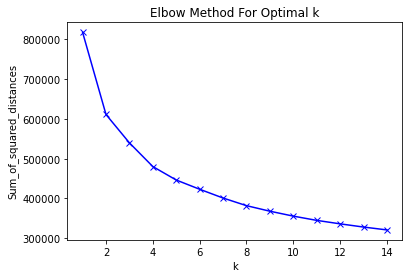

In [153]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
kmeans_A1_with_coords = KMeans(n_clusters=4).fit(A1_df_with_coords_transformed)
centroids = kmeans_A1_with_coords.cluster_centers_
print(centroids)

[[ 3.64853663e-01  1.00000000e+00  1.34655928e-01 -5.92974666e-02
  -1.98768626e-01 -7.05435069e-02  3.82056965e-02  3.34864916e-02
  -3.20248450e-01 -7.88669584e-03 -3.36572587e-01  5.94985082e-02
  -4.07244357e-02]
 [ 6.17937845e-02  1.00000000e+00  9.56561856e-01  1.43212361e+00
   1.46525656e+00  1.38125580e+00  4.06961895e-01 -2.79820565e-03
  -5.42063299e-01  6.09713208e-02 -6.48420281e-01 -2.44715788e-01
   8.90655322e-02]
 [-5.31961486e-01  1.00000000e+00 -8.69932773e-01 -9.60965375e-01
  -8.01834737e-01 -9.09283209e-01 -1.87403512e-01  5.16752977e-01
   9.97056692e-01  6.76319720e-02  1.09453803e+00  1.01556406e-01
  -1.00366793e-02]
 [ 6.38749807e-02  1.00000000e+00 -1.58617320e-02 -1.36865103e-02
  -1.37424144e-02 -1.32915987e-02 -1.29357354e+00 -4.56081666e+00
  -1.49029538e+00 -8.29154487e-01 -1.48020732e+00 -1.55642604e-02
  -9.65814326e-03]]


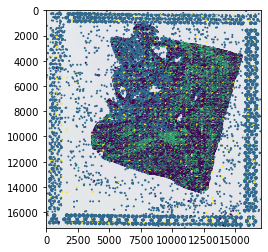

In [176]:
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_with_coords.labels_.astype(float))
plt.show()

## B2

### Without coordinates

Begin with df without the x and y coordinates :

In [94]:
B2_df_wo_coords = PDAC_B2_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y"])
B2_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   22.50     13221.945991     148.265762      123.238940   
1                   56.25     13221.945991     229.297897      180.612488   
2                   18.50     13221.945991     219.379120      164.964777   
3                   13.25     13221.945991     209.646164      152.203821   
4                   18.50     13221.945991     246.869537      169.691705   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      97.844582  111.745285        1.554312e-15         2.201911   
1     138.413345  158.885101        1.733108e-01         2.203774   
2      98.549644  117.509422        1.757970e-01         9.646840   
3     107.101357  145.107941        7.963259e-01        10.012107   
4      99.229431  134.526611        2.588855e-01         9.693675   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  
0            0.847026                 0.000000            0.847026  
1            1.682064                29.911218            1.390544  
2         1512.508475               110.905018         1246.614048  
3         5461.165999                 1.543453         1112.298000  
4         1467.966275               152.599960         1087.931141

In [74]:
B2_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            90953.000000     9.095300e+04   90953.000000    90953.000000   
mean                31.163884     1.322195e+04     204.017360      139.987534   
std                 18.857990     5.102293e-09      33.183889       38.100735   
min                  7.000000     1.322195e+04      44.850224       38.620830   
25%                 17.500000     1.322195e+04     180.422241      113.230889   
50%                 26.000000     1.322195e+04     204.370468      136.099588   
75%                 39.250000     1.322195e+04     230.826965      162.532606   
max                301.000000     1.322195e+04     255.000000      255.000000   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   90953.000000  90953.000000        90953.000000     90953.000000   
mean       81.182518    114.604239            0.338959         9.203006   
std        45.290133     56.881728            0.161323         1.473738   
min         0.015277      0.954327            0.000000         2.201910   
25%        49.138981     72.354988            0.221601         9.005652   
50%        73.296837    107.286453            0.337037         9.445340   
75%       103.983727    146.927094            0.453982         9.870932   
max       255.000000    255.000000            0.907566        11.782099   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count        90953.000000             90953.000000        90953.000000  
mean          2063.376395                85.183683         1300.051338  
std           1549.835808                54.909683          965.242272  
min              0.847026                 0.000000            0.847026  
25%           1082.980442                37.563174          688.137752  
50%           1673.730185                83.045889         1056.119310  
75%           2573.042965               133.175604         1613.221189  
max          20478.707443               179.998103        11408.786853

To give equal importance to all features, scale the features :

In [81]:
mms = StandardScaler()
mms.fit(B2_df_wo_coords)
B2_df_wo_coords_transformed = mms.transform(B2_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [85]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(B2_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

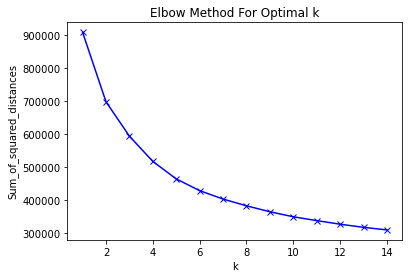

In [86]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [156]:
kmeans_B2_wo_coords = KMeans(n_clusters=4).fit(B2_df_wo_coords_transformed)
centroids = kmeans_B2_wo_coords.cluster_centers_
print(centroids)

[[-0.68049857 -1.         -0.6517785  -0.95407707 -0.79006966 -0.93378581
   0.03230843  0.68184046  1.44946562  0.05275167  1.47826962]
 [-0.1654582  -1.          0.9095865   1.27358545  1.17168575  1.19936565
   0.06507013  0.08330041 -0.38811528  0.0336754  -0.3985937 ]
 [ 0.35384996 -1.         -0.18928688 -0.24856535 -0.2627744  -0.21831665
   0.05098694  0.02395181 -0.29458952  0.02454506 -0.30019078]
 [ 0.02689667 -1.         -0.01471645 -0.01792173 -0.03185484 -0.03788463
  -1.28995522 -4.54563117 -1.27289602 -0.83686755 -1.28315804]]


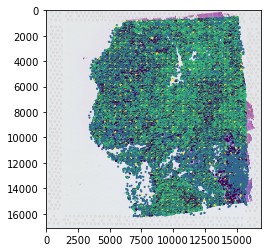

In [157]:
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [72]:
B2_df_with_coords = PDAC_B2_df.drop(columns = ["Name", "Total Nuclei (#)"])

In [75]:
B2_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            90953.000000     9.095300e+04   90953.000000    90953.000000   
mean                31.163884     1.322195e+04     204.017360      139.987534   
std                 18.857990     5.102293e-09      33.183889       38.100735   
min                  7.000000     1.322195e+04      44.850224       38.620830   
25%                 17.500000     1.322195e+04     180.422241      113.230889   
50%                 26.000000     1.322195e+04     204.370468      136.099588   
75%                 39.250000     1.322195e+04     230.826965      162.532606   
max                301.000000     1.322195e+04     255.000000      255.000000   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   90953.000000  90953.000000        90953.000000     90953.000000   
mean       81.182518    114.604239            0.338959         9.203006   
std        45.290133     56.881728            0.161323         1.473738   
min         0.015277      0.954327            0.000000         2.201910   
25%        49.138981     72.354988            0.221601         9.005652   
50%        73.296837    107.286453            0.337037         9.445340   
75%       103.983727    146.927094            0.453982         9.870932   
max       255.000000    255.000000            0.907566        11.782099   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count        90953.000000             90953.000000        90953.000000   
mean          2063.376395                85.183683         1300.051338   
std           1549.835808                54.909683          965.242272   
min              0.847026                 0.000000            0.847026   
25%           1082.980442                37.563174          688.137752   
50%           1673.730185                83.045889         1056.119310   
75%           2573.042965               133.175604         1613.221189   
max          20478.707443               179.998103        11408.786853   

           Center X      Center Y  
count  90953.000000  90953.000000  
mean     890.666957    390.933069  
std     1559.243654   2112.007354  
min    -2533.949153  -3829.585938  
25%     -286.762712  -1029.713018  
50%      966.421569    509.482143  
75%     2188.392308   2153.859848  
max     3715.922414   4006.703883

To give equal importance to all features, scale the features :

In [100]:
mms = StandardScaler()
mms.fit(B2_df_with_coords)
B2_df_with_coords_transformed = mms.transform(B2_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [101]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(B2_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

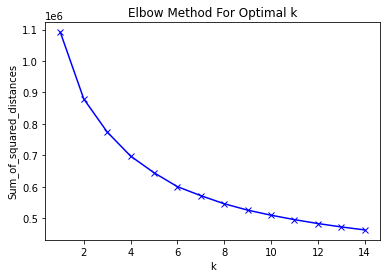

In [102]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [158]:
kmeans_B2_with_coords = KMeans(n_clusters=4).fit(B2_df_with_coords_transformed)
centroids = kmeans_B2_with_coords.cluster_centers_
print(centroids)

[[ 0.36261974 -1.         -0.20172507 -0.25676553 -0.26499574 -0.219994
   0.0586901   0.02026179 -0.29751181  0.02901495 -0.30579607  0.12368768
   0.07212713]
 [-0.67898348 -1.         -0.64610313 -0.9488763  -0.78731631 -0.93146733
   0.02529647  0.67991624  1.43829124  0.04906885  1.47041539 -0.01882759
  -0.11098961]
 [ 0.0255816  -1.         -0.01403499 -0.01536834 -0.0283024  -0.03476249
  -1.28883806 -4.54452922 -1.27260929 -0.83589926 -1.28283492 -0.0686915
   0.05441291]
 [-0.16490781 -1.          0.90798724  1.25620798  1.1452442   1.1739432
   0.05561967  0.08680199 -0.38326933  0.02756334 -0.39132926 -0.21450578
  -0.05923881]]


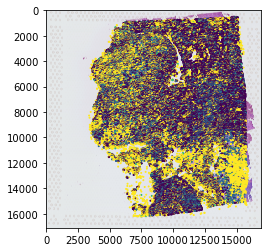

In [159]:
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_with_coords.labels_.astype(float))
plt.show()

## C3

### Without coordinates

Begin with df without the x and y coordinates :

In [107]:
C3_df_wo_coords = PanCN_C3_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y"])
C3_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   37.00      4624.952512     104.315163       70.199417   
1                   52.50      4624.952512     105.821548       60.258968   
2                   33.50      4624.952512     132.559052      104.915861   
3                   34.75      4624.952512     114.042694       65.169379   
4                   50.00      4624.952512     111.790764       80.436637   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      49.392860   60.350582            0.261332         8.969983   
1      33.355782   41.344807            0.394836         8.944638   
2      64.481720  132.559052            0.075851         9.050427   
3      41.246712   74.150513            0.508010         9.324317   
4      46.212833   59.376213            0.281402         8.800007   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  
0         1097.227225                32.302473          810.486585  
1         1774.762880                75.181738         1074.023232  
2          824.995626                30.106611          762.419292  
3         1972.432776               169.161279          970.418105  
4          700.064283               128.933254          503.064811

In [108]:
C3_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           148873.000000     1.488730e+05  148873.000000   148873.000000   
mean                37.984287     4.624953e+03     144.788495       90.269838   
std                 19.190290     6.958567e-09      39.533366       33.036133   
min                  9.000000     4.624953e+03      25.470585       18.158883   
25%                 25.500000     4.624953e+03     117.159142       69.719185   
50%                 34.500000     4.624953e+03     138.569305       82.726312   
75%                 46.000000     4.624953e+03     164.517227       99.978879   
max                289.000000     4.624953e+03     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  148873.000000  148873.000000       148873.000000    148873.000000   
mean       50.932854      75.731491            0.284397         8.953296   
std        29.886122      39.034225            0.142446         1.427927   
min         0.014425       0.024344            0.000000         2.201910   
25%        33.520626      52.611786            0.180197         8.874935   
50%        44.204834      67.219177            0.276941         9.195923   
75%        59.383366      86.220314            0.381013         9.514047   
max       255.000000     255.000000            0.880416        12.317686   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count       148873.000000            148873.000000       148873.000000  
mean          1577.088688                87.346434         1079.828389  
std           1007.611266                55.866830          613.644446  
min              0.847026                 0.000000            0.847026  
25%           1029.843361                37.082894          725.300038  
50%           1387.266242                87.119730          982.608919  
75%           1877.489854               136.721037         1308.980110  
max          22669.608112               179.999346        18513.336566

To give equal importance to all features, scale the features :

In [109]:
mms = StandardScaler()
mms.fit(C3_df_wo_coords)
C3_df_wo_coords_transformed = mms.transform(C3_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [110]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(C3_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

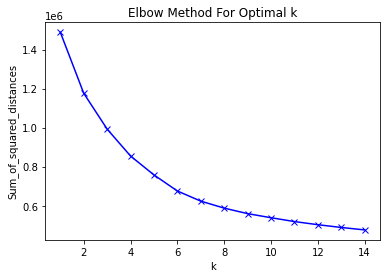

In [111]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [160]:
kmeans_C3_wo_coords = KMeans(n_clusters=4).fit(C3_df_wo_coords_transformed)
centroids = kmeans_C3_wo_coords.cluster_centers_
print(centroids)

[[-4.90204801e-01  1.00000000e+00  2.20433488e+00  2.93411575e+00
   2.75928317e+00  2.82302414e+00  4.99683200e-01  1.56277439e-01
  -1.32654897e-01  6.03759896e-02 -3.03554751e-01  1.73184875e-01
   3.23528814e-01]
 [-7.81153123e-01  1.00000000e+00  1.19966815e-01 -1.56693254e-01
  -3.08542786e-01 -3.49718161e-01  3.53520542e-01  6.43321901e-01
   1.45485053e+00  2.13103812e-02  1.42418940e+00  8.39297021e-02
  -4.42035577e-02]
 [ 2.38095999e-01  1.00000000e+00 -2.26869652e-01 -2.21586600e-01
  -1.67324948e-01 -1.62539683e-01 -7.88426923e-02  7.07306288e-02
  -2.74177170e-01  3.43610224e-02 -2.40644618e-01 -3.72671587e-02
  -1.79579720e-02]
 [ 7.84553972e-02  1.00000000e+00 -9.56700155e-02 -1.34284003e-01
  -1.31639124e-01 -1.35407894e-01 -1.02028658e+00 -4.48890623e+00
  -1.47855232e+00 -8.20445288e-01 -1.66215486e+00  3.38317508e-03
  -8.75203474e-03]]


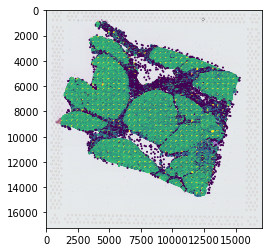

In [161]:
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [127]:
C3_df_with_coords = PanCN_C3_df.drop(columns = ["Name", "Total Nuclei (#)"])
C3_df_with_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   37.00      4624.952512     104.315163       70.199417   
1                   52.50      4624.952512     105.821548       60.258968   
2                   33.50      4624.952512     132.559052      104.915861   
3                   34.75      4624.952512     114.042694       65.169379   
4                   50.00      4624.952512     111.790764       80.436637   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      49.392860   60.350582            0.261332         8.969983   
1      33.355782   41.344807            0.394836         8.944638   
2      64.481720  132.559052            0.075851         9.050427   
3      41.246712   74.150513            0.508010         9.324317   
4      46.212833   59.376213            0.281402         8.800007   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0         1097.227225                32.302473          810.486585   
1         1774.762880                75.181738         1074.023232   
2          824.995626                30.106611          762.419292   
3         1972.432776               169.161279          970.418105   
4          700.064283               128.933254          503.064811   

      Center X     Center Y  
0 -2236.405405  3823.064189  
1 -2229.757143  3820.059524  
2 -2227.414179  3812.813433  
3 -2231.764388  3805.392086  
4 -2247.412500  3804.812500

In [128]:
C3_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           148873.000000     1.488730e+05  148873.000000   148873.000000   
mean                37.984287     4.624953e+03     144.788495       90.269838   
std                 19.190290     6.958567e-09      39.533366       33.036133   
min                  9.000000     4.624953e+03      25.470585       18.158883   
25%                 25.500000     4.624953e+03     117.159142       69.719185   
50%                 34.500000     4.624953e+03     138.569305       82.726312   
75%                 46.000000     4.624953e+03     164.517227       99.978879   
max                289.000000     4.624953e+03     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  148873.000000  148873.000000       148873.000000    148873.000000   
mean       50.932854      75.731491            0.284397         8.953296   
std        29.886122      39.034225            0.142446         1.427927   
min         0.014425       0.024344            0.000000         2.201910   
25%        33.520626      52.611786            0.180197         8.874935   
50%        44.204834      67.219177            0.276941         9.195923   
75%        59.383366      86.220314            0.381013         9.514047   
max       255.000000     255.000000            0.880416        12.317686   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count       148873.000000            148873.000000       148873.000000   
mean          1577.088688                87.346434         1079.828389   
std           1007.611266                55.866830          613.644446   
min              0.847026                 0.000000            0.847026   
25%           1029.843361                37.082894          725.300038   
50%           1387.266242                87.119730          982.608919   
75%           1877.489854               136.721037         1308.980110   
max          22669.608112               179.999346        18513.336566   

            Center X       Center Y  
count  148873.000000  148873.000000  
mean     -113.085518     214.402702  
std      1699.865676    1414.581046  
min     -3644.908537   -3045.835616  
25%     -1571.316667    -861.970588  
50%       -13.034483     225.486486  
75%      1337.761194    1222.879433  
max      3402.091304    3838.837838

To give equal importance to all features, scale the features :

In [129]:
mms = StandardScaler()
mms.fit(C3_df_with_coords)
C3_df_with_coords_transformed = mms.transform(C3_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [130]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(C3_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

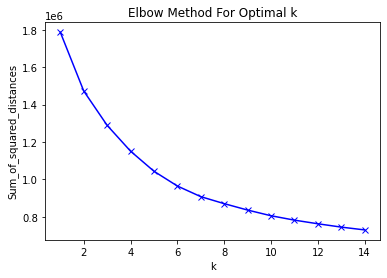

In [131]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
kmeans_C3_with_coords = KMeans(n_clusters=4).fit(C3_df_with_coords_transformed)
centroids = kmeans_C3_with_coords.cluster_centers_
print(centroids)

[[-8.30008454e-01  1.00000000e+00  3.51362018e-01 -1.65601424e-01
  -4.64471651e-01 -4.89134888e-01  4.98253772e-01  7.66555860e-01
   2.21815325e+00  1.22234053e-02  2.09874579e+00  1.03593147e-01
  -3.80415645e-02]
 [-2.07705864e-01  1.00000000e+00 -2.89906783e-01 -2.39425975e-01
  -1.61684076e-01 -1.87862835e-01 -3.87828974e-02  2.12472533e-01
  -5.39386523e-02  7.12626490e-02 -1.18420346e-03 -2.21254378e-02
   1.69249228e-03]
 [ 1.33116096e+00  1.00000000e+00  7.71832386e-02 -1.09516543e-01
  -1.77835924e-01 -9.30182460e-02 -2.79603241e-01 -1.17680104e+00
  -8.47548499e-01 -2.79242120e-01 -9.16230285e-01 -3.42192655e-02
  -1.02220540e-01]
 [-5.09242339e-01  1.00000000e+00  2.20639493e+00  2.93630245e+00
   2.76019930e+00  2.81867064e+00  4.87093346e-01  1.15699326e-01
  -1.36589647e-01  5.21765912e-02 -3.08350295e-01  1.75173173e-01
   3.22284645e-01]]


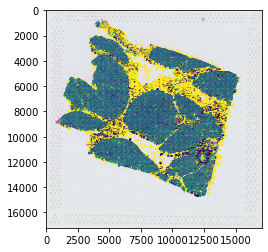

In [163]:
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_with_coords.labels_.astype(float))
plt.show()

## D4

### Without coordinates

Begin with df without the x and y coordinates :

In [115]:
D4_df_wo_coords = PanCN_D4_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y"])
D4_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  \
148873                   67.25     16869.514073     207.866180   
148874                   15.50     16869.514073     225.621124   
148875                   53.50     16869.514073     214.179367   
148876                   72.00     16869.514073     103.540054   
148877                  108.75     16869.514073     178.337784   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
148873       76.370522      20.588024   53.203392            0.471223   
148874      116.456644      40.488068   49.444714            0.531944   
148875       85.728792      21.559574   65.804230            0.168971   
148876       44.120308      13.217054   26.305471            0.111171   
148877      104.297971      36.331284  110.689919            0.489828   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
148873         8.992499         1619.012666                11.602354   
148874        10.161641         3495.264459               179.671109   
148875         9.133137         1763.510254                 6.999199   
148876         8.370774         1543.516585                77.947098   
148877         8.255667          750.763866                31.119760   

        Texture Minor Axis  
148873          856.096916  
148874         1635.978268  
148875         1465.527808  
148876         1371.922466  
148877          383.018743

In [116]:
D4_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           159747.000000     1.597470e+05  159747.000000   159747.000000   
mean                43.310485     1.686951e+04     132.028745       70.936272   
std                 24.135765     6.805952e-08      39.711392       28.702797   
min                  8.000000     1.686951e+04      18.200392        8.171179   
25%                 27.000000     1.686951e+04     103.010284       52.457065   
50%                 38.000000     1.686951e+04     126.895981       64.034750   
75%                 53.500000     1.686951e+04     154.849686       81.529248   
max                309.750000     1.686951e+04     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  159747.000000  159747.000000       159747.000000    159747.000000   
mean       33.676302      55.116022            0.282851         9.018716   
std        24.770797      33.260107            0.141798         1.445190   
min         0.007366       0.011769            0.000000         2.201910   
25%        19.701595      35.252743            0.179601         8.904434   
50%        27.803898      46.909931            0.275623         9.246738   
75%        40.452637      65.330410            0.378418         9.604094   
max       255.000000     255.000000            0.863304        11.941506   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count       159747.000000            159747.000000       159747.000000  
mean          1904.220659                94.120848         1303.749938  
std           1242.026750                58.272379          768.782900  
min              0.847026                 0.000000            0.847026  
25%           1182.185673                40.203487          845.426196  
50%           1638.289787                97.566846         1158.808404  
75%           2300.339132               148.738344         1590.438772  
max          22483.500143               179.999667        12651.292450

To give equal importance to all features, scale the features :

In [117]:
mms = StandardScaler()
mms.fit(D4_df_wo_coords)
D4_df_wo_coords_transformed = mms.transform(D4_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [118]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(D4_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

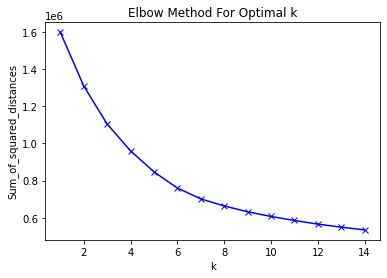

In [119]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [164]:
kmeans_D4_wo_coords = KMeans(n_clusters=4).fit(D4_df_wo_coords_transformed)
centroids = kmeans_D4_wo_coords.cluster_centers_
print(centroids)

[[-6.67779765e-01 -1.00000000e+00 -1.61178805e-03 -3.15591608e-01
  -4.26442465e-01 -4.40761849e-01  3.90970187e-01  6.63302009e-01
   1.48374550e+00  3.86886347e-02  1.43353027e+00]
 [ 2.55096846e-01 -1.00000000e+00 -2.15054492e-01 -2.23356697e-01
  -1.69542859e-01 -1.69353842e-01 -1.14513715e-01  5.27617294e-02
  -2.99202949e-01  3.98071062e-02 -2.56606478e-01]
 [ 5.50751070e-02 -1.00000000e+00 -3.52636610e-02 -6.30343719e-02
  -7.27177680e-02 -6.11737502e-02 -9.66041131e-01 -4.46771574e+00
  -1.44925935e+00 -8.73344527e-01 -1.60453038e+00]
 [-4.74966665e-01 -1.00000000e+00  1.51475230e+00  2.20624562e+00
   2.05530941e+00  2.07762726e+00  4.19468627e-01  1.54937676e-01
  -2.61974103e-01  5.27602785e-03 -3.95141290e-01]]


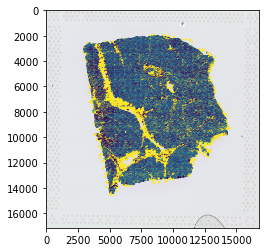

In [165]:
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [134]:
D4_df_with_coords = PanCN_D4_df.drop(columns = ["Name", "Total Nuclei (#)"])
D4_df_with_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  \
148873                   67.25     16869.514073     207.866180   
148874                   15.50     16869.514073     225.621124   
148875                   53.50     16869.514073     214.179367   
148876                   72.00     16869.514073     103.540054   
148877                  108.75     16869.514073     178.337784   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
148873       76.370522      20.588024   53.203392            0.471223   
148874      116.456644      40.488068   49.444714            0.531944   
148875       85.728792      21.559574   65.804230            0.168971   
148876       44.120308      13.217054   26.305471            0.111171   
148877      104.297971      36.331284  110.689919            0.489828   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
148873         8.992499         1619.012666                11.602354   
148874        10.161641         3495.264459               179.671109   
148875         9.133137         1763.510254                 6.999199   
148876         8.370774         1543.516585                77.947098   
148877         8.255667          750.763866                31.119760   

        Texture Minor Axis    Center X     Center Y  
148873          856.096916 -957.519517  3157.102230  
148874         1635.978268 -972.733871  3155.427419  
148875         1465.527808 -966.883178  3152.855140  
148876         1371.922466 -688.531250  3201.194444  
148877          383.018743 -738.820115  3189.266667

In [135]:
D4_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           159747.000000     1.597470e+05  159747.000000   159747.000000   
mean                43.310485     1.686951e+04     132.028745       70.936272   
std                 24.135765     6.805952e-08      39.711392       28.702797   
min                  8.000000     1.686951e+04      18.200392        8.171179   
25%                 27.000000     1.686951e+04     103.010284       52.457065   
50%                 38.000000     1.686951e+04     126.895981       64.034750   
75%                 53.500000     1.686951e+04     154.849686       81.529248   
max                309.750000     1.686951e+04     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  159747.000000  159747.000000       159747.000000    159747.000000   
mean       33.676302      55.116022            0.282851         9.018716   
std        24.770797      33.260107            0.141798         1.445190   
min         0.007366       0.011769            0.000000         2.201910   
25%        19.701595      35.252743            0.179601         8.904434   
50%        27.803898      46.909931            0.275623         9.246738   
75%        40.452637      65.330410            0.378418         9.604094   
max       255.000000     255.000000            0.863304        11.941506   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count       159747.000000            159747.000000       159747.000000   
mean          1904.220659                94.120848         1303.749938   
std           1242.026750                58.272379          768.782900   
min              0.847026                 0.000000            0.847026   
25%           1182.185673                40.203487          845.426196   
50%           1638.289787                97.566846         1158.808404   
75%           2300.339132               148.738344         1590.438772   
max          22483.500143               179.999667        12651.292450   

            Center X       Center Y  
count  159747.000000  159747.000000  
mean      -19.405643     527.971047  
std      1328.007793    1515.311001  
min     -2742.760989   -2999.771186  
25%     -1127.135266    -639.166026  
50%       -42.574324     550.804511  
75%      1075.901006    1835.839262  
max      3002.791379    3307.496094

To give equal importance to all features, scale the features :

In [136]:
mms = StandardScaler()
mms.fit(D4_df_with_coords)
D4_df_with_coords_transformed = mms.transform(D4_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [137]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(D4_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

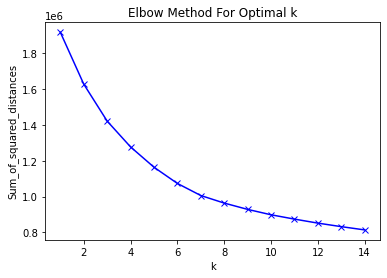

In [138]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [166]:
kmeans_D4_with_coords = KMeans(n_clusters=4).fit(D4_df_with_coords_transformed)
centroids = kmeans_D4_with_coords.cluster_centers_
print(centroids)

[[-0.66556314 -1.         -0.02509585 -0.32484755 -0.42762774 -0.4423213
   0.37618309  0.65663031  1.45383163  0.04030939  1.40998262 -0.22225254
   0.13896655]
 [-0.47266587 -1.          1.48135645  2.15408416  2.00522658  2.02343247
   0.41371637  0.15753694 -0.25881554  0.00885198 -0.38972276 -0.0642479
  -0.18725013]
 [ 0.26500205 -1.         -0.21565692 -0.22781835 -0.17425265 -0.17338223
  -0.11601603  0.04974521 -0.30295118  0.0390624  -0.26082122  0.07457214
  -0.01168276]
 [ 0.05406604 -1.         -0.03412101 -0.06096386 -0.07122777 -0.05954565
  -0.96679683 -4.46859345 -1.44946524 -0.87385372 -1.60479997  0.01301822
  -0.0145847 ]]


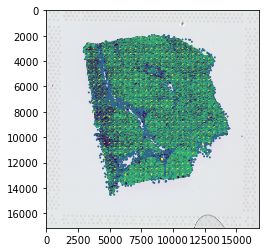

In [167]:
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_with_coords.labels_.astype(float))
plt.show()

## Plot results

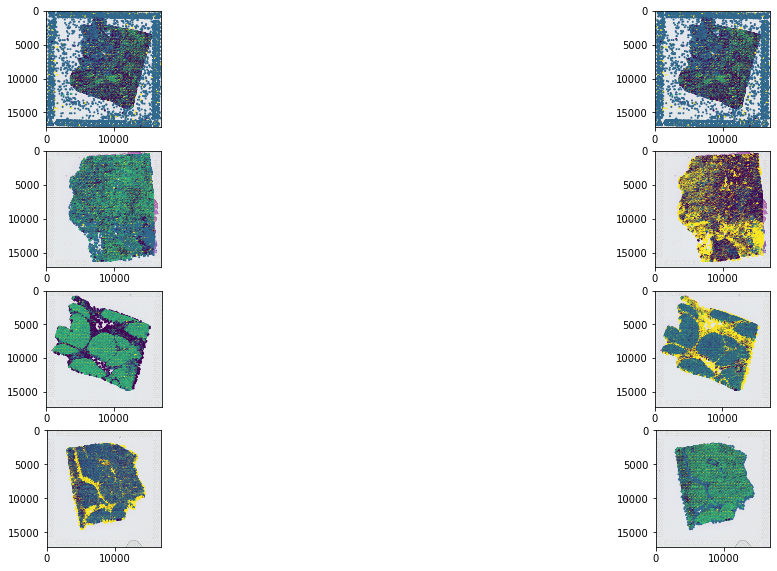

In [178]:
# create figure
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 6
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 2)
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 3)
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 4)
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 5)
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 6)
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 7)
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 8)
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_with_coords.labels_.astype(float))